# **One day Stock Price Prediction**

#**Dataset Type:** 
####            **Flat**
####            **Medium-flat**
####            **Fluctuate**
**Dataset Download: https://finance.yahoo.com/**            

#**Using Model** 
####RNN(Recurrent Neural Network)
####LSTM(Long Short Term Memory)
####GRU(Gated Recurrent Unit)


**IMPORT Libraries**

In [4]:
import numpy
import pandas
import pandas as pd
import pandas as np
import numpy as np
import csv
import math
import datetime
import scipy
import tqdm
import keras
import tensorflow as tf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
import seaborn as seabornInstance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import GRU
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
%matplotlib inline
#import matplotlib.cbook as cbook
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
from tqdm import tqdm_notebook
from sklearn import metrics
from math import sqrt
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import val_mean_absolute_percentage_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Flat Dataset 1 Day Stock Price Prediction**



**Dataset Details: Honda Motor Company Ltd(HMC).**

**Load Dataset**

In [2]:
df1 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/HMC.csv', date_parser=True)
df1.head()

Date       Open       High        Low      Close  Adj Close  Volume
0  6/30/2000  17.109375  17.250000  17.109375  17.187500  11.091072   13200
1   7/3/2000  16.750000  16.843750  16.718750  16.718750  10.788588   18400
2   7/5/2000  18.437500  18.437500  18.187500  18.203125  11.746451  126800
3   7/6/2000  18.140625  18.203125  17.921875  18.062500  11.655708   47600
4   7/7/2000  17.750000  17.937500  17.750000  17.859375  11.524632   27200

In [3]:
df1.tail()

Date       Open       High        Low      Close  Adj Close  Volume
5040  7/15/2020  26.570000  26.629999  26.309999  26.500000  26.500000  852100
5041  7/16/2020  26.450001  26.570000  26.299999  26.440001  26.440001  440400
5042  7/17/2020  26.350000  26.370001  26.150000  26.230000  26.230000  406100
5043  7/20/2020  26.100000  26.250000  26.080000  26.219999  26.219999  342800
5044  7/21/2020  25.850000  26.055000  25.820000  25.924999  25.924999  710344

**Dataset Preprocessing**

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5045 non-null   object 
 1   Open       5045 non-null   float64
 2   High       5045 non-null   float64
 3   Low        5045 non-null   float64
 4   Close      5045 non-null   float64
 5   Adj Close  5045 non-null   float64
 6   Volume     5045 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [5]:
df1.describe()

Open         High  ...    Adj Close        Volume
count  5045.000000  5045.000000  ...  5045.000000  5.045000e+03
mean     29.078816    29.270237  ...    22.874087  5.860039e+05
std       6.284502     6.298150  ...     6.200877  5.049281e+05
min      13.745000    13.875000  ...     9.010729  9.200000e+03
25%      24.400000    24.540001  ...    17.114697  2.828000e+05
50%      29.680000    29.879999  ...    24.418415  4.623000e+05
75%      33.889999    34.090000  ...    27.521568  7.326000e+05
max      44.340000    44.560001  ...    35.261700  7.276300e+06

[8 rows x 6 columns]

In [6]:
df1.shape

(5045, 7)

In [7]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df1.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df1.apply(num_missing, axis=1).head())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [8]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1.head(10)

Date       Open       High        Low      Close  Adj Close  Volume
0 2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072   13200
1 2000-07-03  16.750000  16.843750  16.718750  16.718750  10.788588   18400
2 2000-07-05  18.437500  18.437500  18.187500  18.203125  11.746451  126800
3 2000-07-06  18.140625  18.203125  17.921875  18.062500  11.655708   47600
4 2000-07-07  17.750000  17.937500  17.750000  17.859375  11.524632   27200
5 2000-07-10  18.046875  18.437500  18.046875  18.296875  11.806949   31200
6 2000-07-11  18.359375  18.500000  18.250000  18.359375  11.847281  122800
7 2000-07-12  18.062500  18.187500  18.046875  18.156250  11.716208   27200
8 2000-07-13  18.093750  18.312500  18.062500  18.250000  11.776699   42400
9 2000-07-14  18.468750  18.468750  18.187500  18.250000  11.776699   95200

In [9]:
df1.set_index('Date',inplace=True)
df1.sort_values('Date',ascending=True)

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072   13200
2000-07-03  16.750000  16.843750  16.718750  16.718750  10.788588   18400
2000-07-05  18.437500  18.437500  18.187500  18.203125  11.746451  126800
2000-07-06  18.140625  18.203125  17.921875  18.062500  11.655708   47600
2000-07-07  17.750000  17.937500  17.750000  17.859375  11.524632   27200
...               ...        ...        ...        ...        ...     ...
2020-07-15  26.570000  26.629999  26.309999  26.500000  26.500000  852100
2020-07-16  26.450001  26.570000  26.299999  26.440001  26.440001  440400
2020-07-17  26.350000  26.370001  26.150000  26.230000  26.230000  406100
2020-07-20  26.100000  26.250000  26.080000  26.219999  26.219999  342800
2020-07-21  25.850000  26.055000  25.820000  25.924999  25.924999  710344

[5045 rows x 6 columns]

**Open, High, Low, Close Price History in Plot**

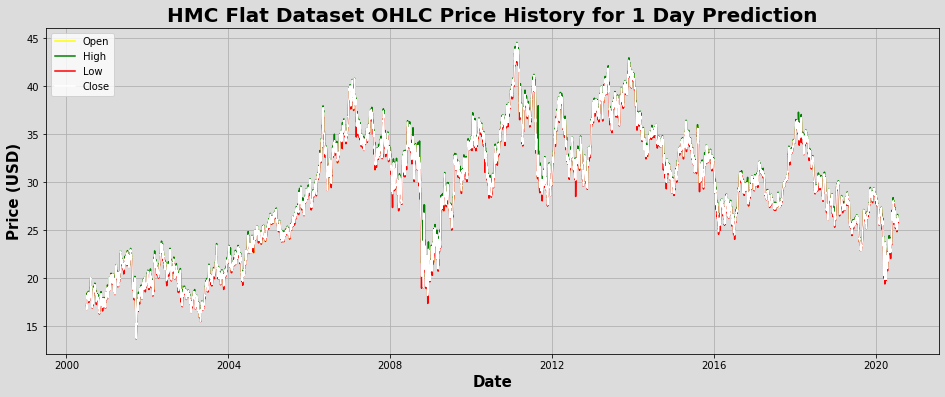

In [10]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.plot(df1["Open"], color = 'yellow')
plt.plot(df1["High"], color = 'green')
plt.plot(df1["Low"], color = 'red')
plt.plot(df1["Close"],color = 'white')
plt.title('HMC Flat Dataset OHLC Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History in Plot**

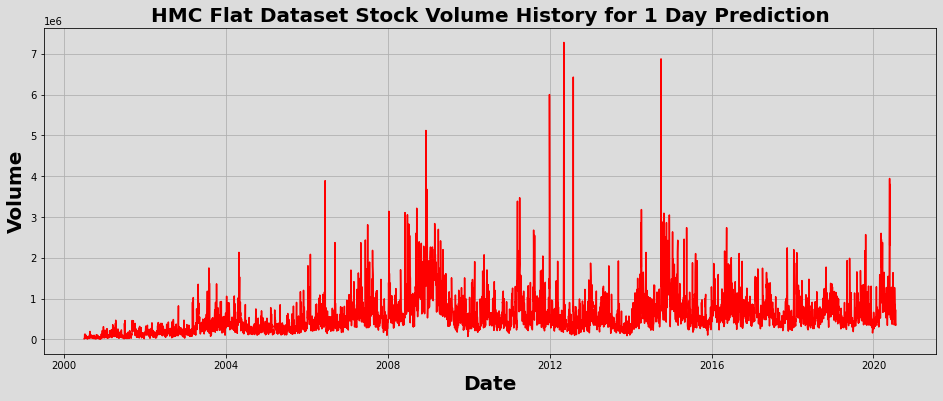

In [11]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.plot(df1["Volume"], color = 'red')
plt.title('HMC Flat Dataset Stock Volume History for 1 Day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

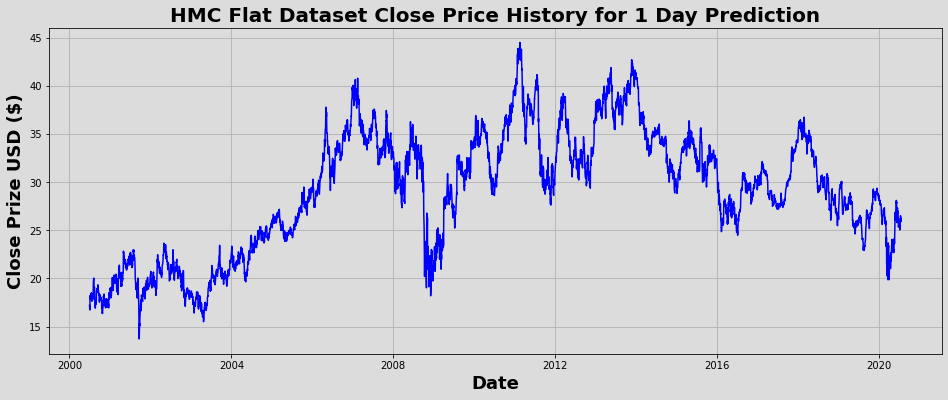

In [12]:
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
plt.title('HMC Flat Dataset Close Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df1['Close'], color = 'blue',)
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

#plt.plot(y_test, color = 'red', label = 'Real HMC Stock Price')

In [13]:
training_1 = df1[df1.index < datetime.datetime(year=2016, month=7, day=19)]
training_1

Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2000-06-30  17.109375  17.250000  17.109375  17.187500  11.091072    13200
2000-07-03  16.750000  16.843750  16.718750  16.718750  10.788588    18400
2000-07-05  18.437500  18.437500  18.187500  18.203125  11.746451   126800
2000-07-06  18.140625  18.203125  17.921875  18.062500  11.655708    47600
2000-07-07  17.750000  17.937500  17.750000  17.859375  11.524632    27200
...               ...        ...        ...        ...        ...      ...
2016-07-12  26.059999  26.200001  26.000000  26.070000  23.250275  1225400
2016-07-13  26.389999  26.459999  26.080000  26.280001  23.437569  1084500
2016-07-14  25.990000  26.040001  25.760000  25.930000  23.125423  1135000
2016-07-15  26.500000  26.639999  26.450001  26.469999  23.607014  1117300
2016-07-18  26.500000  26.709999  26.490000  26.639999  23.758629   959600

[4036 rows x 6 columns]

In [14]:
testing_1 = df1[df1.index >= datetime.datetime(year=2016, month=7, day=19)]
testing_1

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2016-07-19  26.559999  26.600000  26.430000  26.469999  23.607014  402500
2016-07-20  26.540001  26.600000  26.420000  26.580000  23.705118  811600
2016-07-21  27.080000  27.170000  26.850000  26.910000  23.999424  807100
2016-07-22  26.840000  26.900000  26.740000  26.820000  23.919161  544500
2016-07-25  26.910000  26.959999  26.799999  26.889999  23.981588  421100
...               ...        ...        ...        ...        ...     ...
2020-07-15  26.570000  26.629999  26.309999  26.500000  26.500000  852100
2020-07-16  26.450001  26.570000  26.299999  26.440001  26.440001  440400
2020-07-17  26.350000  26.370001  26.150000  26.230000  26.230000  406100
2020-07-20  26.100000  26.250000  26.080000  26.219999  26.219999  342800
2020-07-21  25.850000  26.055000  25.820000  25.924999  25.924999  710344

[1009 rows x 6 columns]

**Training & Testing Combination**

<function matplotlib.pyplot.show>

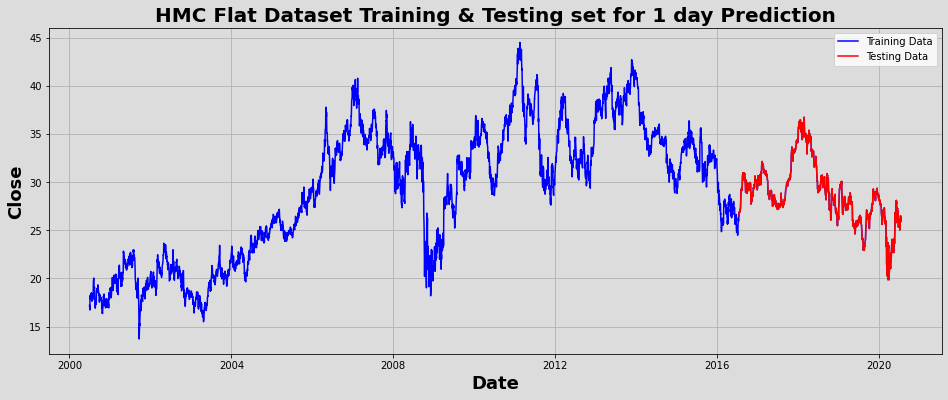

In [15]:
plt.figure(figsize = (16,6), facecolor = '#dcdcdc')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#dcdcdc')
training_1, testing_1 = df1[df1.index < datetime.datetime(year=2016, month=7, day=19)], df1[df1.index >= datetime.datetime(year=2016, month=7, day=19)]
#plt.figure(figsize=(12,7))
plt.title('HMC Flat Dataset Training & Testing set for 1 day Prediction', fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot(df1['Close'], 'blue', label='Training Data')
plt.plot(testing_1['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [16]:
training_length_1 = training_1.filter(['Close'])
training_length_1

Close
Date                 
2000-06-30  17.187500
2000-07-03  16.718750
2000-07-05  18.203125
2000-07-06  18.062500
2000-07-07  17.859375
...               ...
2016-07-12  26.070000
2016-07-13  26.280001
2016-07-14  25.930000
2016-07-15  26.469999
2016-07-18  26.639999

[4036 rows x 1 columns]

In [17]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-19  26.469999
2016-07-20  26.580000
2016-07-21  26.910000
2016-07-22  26.820000
2016-07-25  26.889999
...               ...
2020-07-15  26.500000
2020-07-16  26.440001
2020-07-17  26.230000
2020-07-20  26.219999
2020-07-21  25.924999

[1009 rows x 1 columns]

**Feature Scalling**

In [18]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_1 = sc.fit_transform(training_length_1)
training_length_scaled_1

array([[0.11305124],
       [0.09782343],
       [0.14604482],
       ...,
       [0.39705999],
       [0.41460239],
       [0.42012501]])

**Create a data Structure with 30 timestaps and 1 Output**

In [19]:
X_train_1 = []
y_train_1 = []
#length_TF_1 = len(testing_length_TF_1)
for i in range(30, 4036):
    X_train_1.append(training_length_scaled_1[i-30:i, 0])
    y_train_1.append(training_length_scaled_1[i, 0])
X_train_1, y_train_1 = np.array(X_train_1), np.array(y_train_1)
print (X_train_1[0])
print ('\n')
print (y_train_1[0])

[0.11305124 0.09782343 0.14604482 0.14147648 0.13487776 0.14909038
 0.15112076 0.14452204 0.1475676  0.1475676  0.1556891  0.15213594
 0.1394461  0.15315113 0.12726386 0.14096889 0.15162835 0.13843092
 0.13335498 0.13132461 0.15061316 0.1394461  0.16279541 0.16584097
 0.19325102 0.20543327 0.19426621 0.17599284 0.1638106  0.17243969]


0.17497765451294373


**Reshaping**

In [20]:
X_train_1.shape

(4006, 30)

In [21]:
X_train_1 = np.reshape(X_train_1, (X_train_1.shape[0], X_train_1.shape[1], 1))
X_train_1.shape

(4006, 30, 1)

**Build RNN MOdel**

In [37]:
#The RNN Model Build
regressorRNN_1 = Sequential()
regressorRNN_1.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(SimpleRNN(units=64))
regressorRNN_1.add(Dropout(0.2))
regressorRNN_1.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_1.summary()

# Fitting to the training set
history_1 = regressorRNN_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

# from keras.callbacks import ModelCheckpoint
# checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mean_squared_error', verbose=1, save_best_only=True, mode='min')

# callbacks_list = [checkpoint]
# history = regressorRNN_1.fit(X_train_1, y_train_1, epochs=100, batch_size=64, verbose=1, callbacks=callbacks_list, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 30, 64)            4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 35ms/step - loss: 0.0647 - mae: 0.1956 - mse: 0.0647
Epoch 2

In [38]:
# plt.plot(history.history['mean_squared_error'])
# plt.plot(history.history['val_mean_squared_error'])
# plt.title('model mean squared error')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.plot(history.history['mean_absolute_error'])
# plt.plot(history.history['val_mean_absolute_error'])
# plt.title('model mean absolute error')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

**Getting The Real Stock Price**

In [39]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-19  26.469999
2016-07-20  26.580000
2016-07-21  26.910000
2016-07-22  26.820000
2016-07-25  26.889999
...               ...
2020-07-15  26.500000
2020-07-16  26.440001
2020-07-17  26.230000
2020-07-20  26.219999
2020-07-21  25.924999

[1009 rows x 1 columns]

In [40]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.9     ],
       [30.809999],
       [30.780001],
       [30.959999],
       [30.77    ],
       [30.879999],
       [30.84    ],
       [30.09    ],
       [30.41    ],
       [30.1     ],
       [29.620001],
       [29.48    ],
       [28.92    ],
       [29.030001],
       [28.98    ],
       [29.77    ],
       [30.190001],
       [29.49    ],
       [29.030001],
       [29.049999],
       [29.17    ],
       [28.83    ],
       [28.92    ],
       [29.01    ],
       [29.059999],
       [29.9     ],
       [29.59    ],
       [29.459999],
       [29.639999],
       [29.15    ],
       [29.280001],
       [29.24    ],
       [29.41    ],
       [29.15    ],
       [29.52    ],
       [29.280001],
       [29.67    ],
       [29.790001],
       [29.690001],
       [29.92    ],
       [29.940001],
       [29.950001],
       [29.82    ],
       [29.83    ],
       [29.030001],
       [28.379999],
       [28.389999],
       [27.709999],
       [28.309999],
       [28.43    ],


**Getting the Predicted Stock Price**

In [41]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.41460239],
       [0.41817588],
       [0.42889626],
       ...,
       [0.40680579],
       [0.4064809 ],
       [0.39689753]])

In [42]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(979, 30)

In [43]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape
print(X_test_1)

[[[0.41460239]
  [0.41817588]
  [0.42889626]
  ...
  [0.54941931]
  [0.53674974]
  [0.54941931]]

 [[0.41817588]
  [0.42889626]
  [0.42597252]
  ...
  [0.53674974]
  [0.54941931]
  [0.55851535]]

 [[0.42889626]
  [0.42597252]
  [0.42824651]
  ...
  [0.54941931]
  [0.55851535]
  [0.55559158]]

 ...

 [[0.42954598]
  [0.46365627]
  [0.46722973]
  ...
  [0.39770974]
  [0.41557701]
  [0.41362788]]

 [[0.46365627]
  [0.46722973]
  [0.45780876]
  ...
  [0.41557701]
  [0.41362788]
  [0.40680579]]

 [[0.46722973]
  [0.45780876]
  [0.46203197]
  ...
  [0.41362788]
  [0.40680579]
  [0.4064809 ]]]


In [44]:
RNN_1_Stock_Price_Prediction_1 = regressorRNN_1.predict(X_test_1)
RNN_1_Stock_Price_Prediction_1 = sc.inverse_transform(RNN_1_Stock_Price_Prediction_1)

In [45]:
print(RNN_1_Stock_Price_Prediction_1)

[[30.683893]
 [30.969873]
 [30.870832]
 [30.904339]
 [31.037518]
 [30.889845]
 [30.956766]
 [30.942528]
 [30.257853]
 [30.499666]
 [30.254183]
 [29.793335]
 [29.637157]
 [29.086695]
 [29.14624 ]
 [29.075493]
 [29.82524 ]
 [30.244154]
 [29.5922  ]
 [29.186895]
 [29.122524]
 [29.194143]
 [28.94414 ]
 [28.97083 ]
 [29.031982]
 [29.121061]
 [29.8751  ]
 [29.665455]
 [29.5319  ]
 [29.652102]
 [29.167894]
 [29.32551 ]
 [29.312847]
 [29.45006 ]
 [29.238535]
 [29.527092]
 [29.36389 ]
 [29.662296]
 [29.815248]
 [29.752728]
 [29.953281]
 [29.95001 ]
 [30.031113]
 [29.87516 ]
 [29.932348]
 [29.150808]
 [28.503784]
 [28.48963 ]
 [27.90607 ]
 [28.404684]
 [28.537207]
 [28.103294]
 [28.43698 ]
 [28.353302]
 [28.582289]
 [28.667658]
 [28.573942]
 [28.949757]
 [28.720352]
 [28.670685]
 [28.609222]
 [28.676676]
 [29.40555 ]
 [29.300945]
 [29.426542]
 [29.786663]
 [29.64276 ]
 [29.457758]
 [29.487743]
 [29.535606]
 [29.995726]
 [30.325235]
 [30.650387]
 [30.279642]
 [30.330404]
 [30.095715]
 [30.217535]

<function matplotlib.pyplot.show>

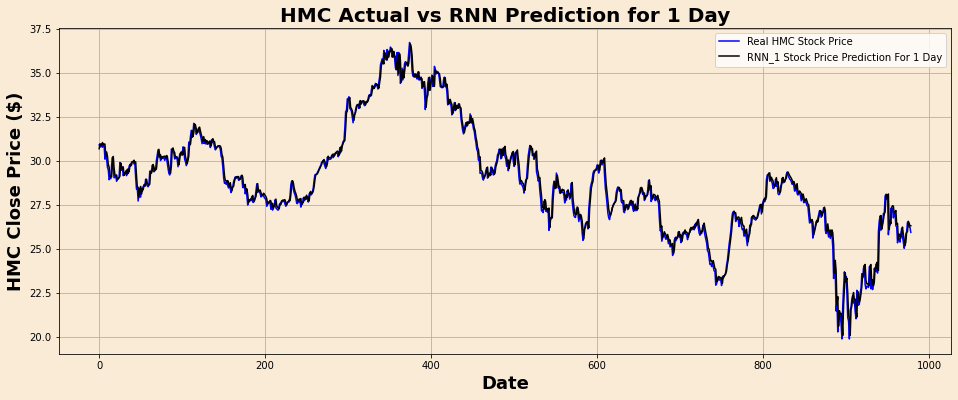

In [46]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real HMC Stock Price')
plt.plot(RNN_1_Stock_Price_Prediction_1, color = 'black', label = 'RNN_1 Stock Price Prediction For 1 Day')
plt.title('HMC Actual vs RNN Prediction for 1 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

**Error Comparison**

In [47]:
print ('R Squared =',r2_score(y_test_1, RNN_1_Stock_Price_Prediction_1))

R Squared = 0.9832108942357677


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, RNN_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.2882628340296369


In [49]:
def mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1): 
    y_test_1, RNN_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(RNN_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - RNN_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, RNN_1_Stock_Price_Prediction_1))  

Mean Absolute Percentage Error: 1.0364794092431386


In [50]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.16680835981546155


In [51]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, RNN_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.40842179155312164


**Build LSTM Model**

In [52]:
#The LSTM Model Build
regressorLSTM_1 = Sequential()

regressorLSTM_1.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(LSTM(units=256))
regressorLSTM_1.add(Dropout(0.2))
regressorLSTM_1.add(Dense(units=1))
regressorLSTM_1.summary()

# Compiling the LSTM
regressorLSTM_1.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae', 'mse'])

# Fitting to the training set
history_1 = regressorLSTM_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 256)           264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 10ms/step - loss: 0.0111 - mae: 0.0603 - mse: 0.0111
Epoch

In [53]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-19  26.469999
2016-07-20  26.580000
2016-07-21  26.910000
2016-07-22  26.820000
2016-07-25  26.889999
...               ...
2020-07-15  26.500000
2020-07-16  26.440001
2020-07-17  26.230000
2020-07-20  26.219999
2020-07-21  25.924999

[1009 rows x 1 columns]

In [54]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.9     ],
       [30.809999],
       [30.780001],
       [30.959999],
       [30.77    ],
       [30.879999],
       [30.84    ],
       [30.09    ],
       [30.41    ],
       [30.1     ],
       [29.620001],
       [29.48    ],
       [28.92    ],
       [29.030001],
       [28.98    ],
       [29.77    ],
       [30.190001],
       [29.49    ],
       [29.030001],
       [29.049999],
       [29.17    ],
       [28.83    ],
       [28.92    ],
       [29.01    ],
       [29.059999],
       [29.9     ],
       [29.59    ],
       [29.459999],
       [29.639999],
       [29.15    ],
       [29.280001],
       [29.24    ],
       [29.41    ],
       [29.15    ],
       [29.52    ],
       [29.280001],
       [29.67    ],
       [29.790001],
       [29.690001],
       [29.92    ],
       [29.940001],
       [29.950001],
       [29.82    ],
       [29.83    ],
       [29.030001],
       [28.379999],
       [28.389999],
       [27.709999],
       [28.309999],
       [28.43    ],


In [55]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.41460239],
       [0.41817588],
       [0.42889626],
       ...,
       [0.40680579],
       [0.4064809 ],
       [0.39689753]])

In [56]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape

(979, 30)

In [57]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(979, 30, 1)

In [58]:
LSTM_1_Stock_Price_Prediction_1 = regressorLSTM_1.predict(X_test_1)
LSTM_1_Stock_Price_Prediction_1 = sc.inverse_transform(LSTM_1_Stock_Price_Prediction_1)

In [65]:
print(LSTM_1_Stock_Price_Prediction_1)

[[30.532156]
 [30.809656]
 [30.743408]
 [30.713161]
 [30.87579 ]
 [30.709787]
 [30.803896]
 [30.771662]
 [30.086998]
 [30.338636]
 [30.066755]
 [29.612595]
 [29.450079]
 [28.925526]
 [28.98137 ]
 [28.934399]
 [29.646988]
 [30.068346]
 [29.446972]
 [28.983685]
 [28.967957]
 [29.082071]
 [28.785406]
 [28.845638]
 [28.931305]
 [28.981466]
 [29.752335]
 [29.51358 ]
 [29.379036]
 [29.534544]
 [29.102701]
 [29.195711]
 [29.169762]
 [29.326128]
 [29.100002]
 [29.420927]
 [29.221987]
 [29.564018]
 [29.694519]
 [29.611588]
 [29.817125]
 [29.849567]
 [29.863888]
 [29.748796]
 [29.753754]
 [29.02963 ]
 [28.390179]
 [28.34881 ]
 [27.734493]
 [28.222214]
 [28.367584]
 [27.914381]
 [28.244736]
 [28.174292]
 [28.408844]
 [28.523935]
 [28.448994]
 [28.817379]
 [28.628284]
 [28.516855]
 [28.439554]
 [28.584568]
 [29.267977]
 [29.196611]
 [29.309954]
 [29.619518]
 [29.53253 ]
 [29.303421]
 [29.347073]
 [29.428247]
 [29.905098]
 [30.210592]
 [30.5136  ]
 [30.14655 ]
 [30.212027]
 [29.954128]
 [30.109089]

<function matplotlib.pyplot.show>

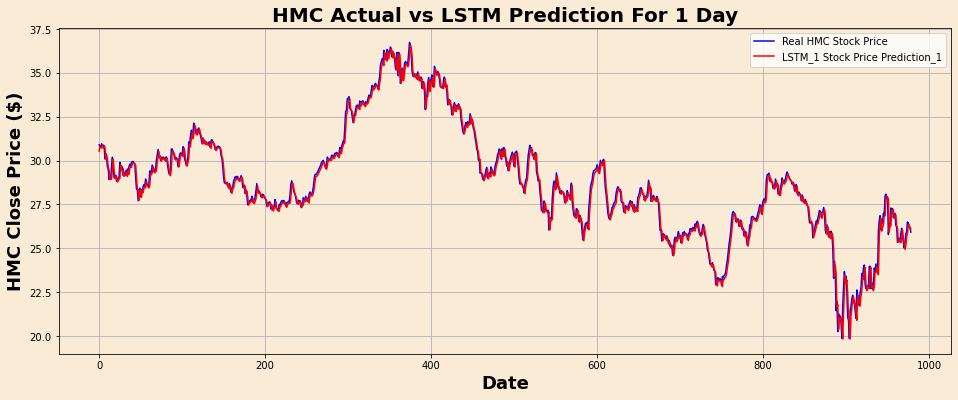

In [66]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real HMC Stock Price')
plt.plot(LSTM_1_Stock_Price_Prediction_1, color = 'red', label = 'LSTM_1 Stock Price Prediction_1')
plt.title('HMC Actual vs LSTM Prediction For 1 Day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [67]:
print ('R Squared =',r2_score(y_test_1, LSTM_1_Stock_Price_Prediction_1))

R Squared = 0.9834649508873933


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.2918522612368278


In [69]:
def mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1): 
    y_test_1, LSTM_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(LSTM_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - LSTM_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 1.0438727254956575


In [70]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.1642841769344319


In [71]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, LSTM_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.4053198452264975


**Build GRU Model**

In [87]:
#The GRU Model Build
regressorGRU_1 = Sequential()

regressorGRU_1.add(GRU(units=1024, return_sequences=True, input_shape=(X_train_1.shape[1],1)))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(GRU(units=512))
regressorGRU_1.add(Dropout(0.2))
regressorGRU_1.add(Dense(units=1))
regressorGRU_1.summary()

# Compiling the GRU
regressorGRU_1.compile(optimizer='adam',loss='mean_squared_error' , metrics=['mae','mse'])

# Fitting to the training set
history_1 = (regressorGRU_1.fit(X_train_1,y_train_1,epochs=100,batch_size=64))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 30, 1024)          3154944   
_________________________________________________________________
dropout_8 (Dropout)          (None, 30, 1024)          0         
_________________________________________________________________
gru_3 (GRU)                  (None, 512)               2362368   
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 5,517,825
Trainable params: 5,517,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 27ms/step - loss: 0.0085 - mae: 0.0466 - mse: 0.0085
E

In [88]:
testing_length_1 = testing_1.filter(['Close'])
testing_length_1

Close
Date                 
2016-07-19  26.469999
2016-07-20  26.580000
2016-07-21  26.910000
2016-07-22  26.820000
2016-07-25  26.889999
...               ...
2020-07-15  26.500000
2020-07-16  26.440001
2020-07-17  26.230000
2020-07-20  26.219999
2020-07-21  25.924999

[1009 rows x 1 columns]

In [89]:
y_test_1 = testing_length_1.iloc[30:, 0:].values
y_test_1

array([[30.9     ],
       [30.809999],
       [30.780001],
       [30.959999],
       [30.77    ],
       [30.879999],
       [30.84    ],
       [30.09    ],
       [30.41    ],
       [30.1     ],
       [29.620001],
       [29.48    ],
       [28.92    ],
       [29.030001],
       [28.98    ],
       [29.77    ],
       [30.190001],
       [29.49    ],
       [29.030001],
       [29.049999],
       [29.17    ],
       [28.83    ],
       [28.92    ],
       [29.01    ],
       [29.059999],
       [29.9     ],
       [29.59    ],
       [29.459999],
       [29.639999],
       [29.15    ],
       [29.280001],
       [29.24    ],
       [29.41    ],
       [29.15    ],
       [29.52    ],
       [29.280001],
       [29.67    ],
       [29.790001],
       [29.690001],
       [29.92    ],
       [29.940001],
       [29.950001],
       [29.82    ],
       [29.83    ],
       [29.030001],
       [28.379999],
       [28.389999],
       [27.709999],
       [28.309999],
       [28.43    ],


In [90]:
testing_length_scaled_1 = sc.transform(testing_length_1)
testing_length_scaled_1

array([[0.41460239],
       [0.41817588],
       [0.42889626],
       ...,
       [0.40680579],
       [0.4064809 ],
       [0.39689753]])

In [91]:
X_test_1 = [] 
length_1 = len(testing_length_1)
for i in range(30, length_1):
    X_test_1.append(testing_length_scaled_1[i-30:i, 0])    
X_test_1 = np.array(X_test_1)
X_test_1.shape  

(979, 30)

In [92]:
X_test_1 = np.reshape(X_test_1, (X_test_1.shape[0], X_test_1.shape[1], 1))
X_test_1.shape

(979, 30, 1)

In [93]:
GRU_1_Stock_Price_Prediction_1 = regressorGRU_1.predict(X_test_1)
GRU_1_Stock_Price_Prediction_1 = sc.inverse_transform(GRU_1_Stock_Price_Prediction_1)

In [94]:
print(GRU_1_Stock_Price_Prediction_1)

[[30.769499]
 [31.030653]
 [30.960413]
 [30.949152]
 [31.100403]
 [30.916815]
 [31.028172]
 [30.989252]
 [30.269474]
 [30.567467]
 [30.242958]
 [29.780155]
 [29.646553]
 [29.062733]
 [29.16637 ]
 [29.105494]
 [29.873213]
 [30.300753]
 [29.640814]
 [29.200472]
 [29.166574]
 [29.267027]
 [28.966867]
 [29.064154]
 [29.138079]
 [29.179401]
 [30.009136]
 [29.712229]
 [29.60474 ]
 [29.771734]
 [29.271698]
 [29.419676]
 [29.369848]
 [29.533096]
 [29.297962]
 [29.645761]
 [29.412132]
 [29.788885]
 [29.914845]
 [29.816282]
 [30.05703 ]
 [30.062897]
 [30.083115]
 [29.964945]
 [29.966478]
 [29.194101]
 [28.547337]
 [28.528017]
 [27.836523]
 [28.44501 ]
 [28.548237]
 [28.058107]
 [28.485847]
 [28.34055 ]
 [28.618774]
 [28.742222]
 [28.646769]
 [29.064465]
 [28.820913]
 [28.72507 ]
 [28.64577 ]
 [28.786116]
 [29.514555]
 [29.398462]
 [29.54647 ]
 [29.860884]
 [29.731739]
 [29.51315 ]
 [29.562962]
 [29.630592]
 [30.137365]
 [30.443617]
 [30.759144]
 [30.371733]
 [30.445078]
 [30.154417]
 [30.319555]

<function matplotlib.pyplot.show>

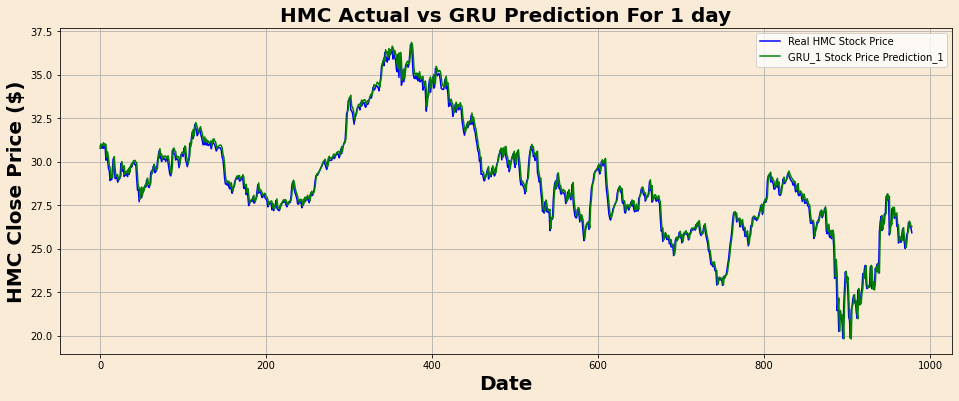

In [95]:
plt.figure(figsize = (16,6), facecolor = '#faebd7')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#faebd7')
#plt.figure(figsize=(16,8))
plt.plot(y_test_1, color = 'blue', label = 'Real HMC Stock Price')
plt.plot(GRU_1_Stock_Price_Prediction_1, color = 'green', label = 'GRU_1 Stock Price Prediction_1')
plt.title('HMC Actual vs GRU Prediction For 1 day',fontweight = "bold",fontsize = 20)
plt.xlabel('Date', fontsize = 20,fontweight = "bold")
plt.ylabel('HMC Close Price ($)', fontsize = 20,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [96]:
print ('R Squared =',r2_score(y_test_1, GRU_1_Stock_Price_Prediction_1))

R Squared = 0.9822697067967878


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Error: 0.30068969494416925


In [98]:
def mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1): 
    y_test_1, GRU_1_Stock_Price_Prediction_1 = np.array(y_test_1), np.array(GRU_1_Stock_Price_Prediction_1)
    return np.mean(np.abs((y_test_1 - GRU_1_Stock_Price_Prediction_1) / y_test_1)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_1, GRU_1_Stock_Price_Prediction_1)) 

Mean Absolute Percentage Error: 1.0749838923592703


In [99]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1))

Mean Squared Error: 0.17615953879901536


In [100]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_1, GRU_1_Stock_Price_Prediction_1)))

Root Mean Squared Error: 0.4197136390433546


# **Medium Flat Dataset 1 Day Stock Price Prediction**


**Datase Details : Oracle Corporation (ORCL)**

In [6]:
df2 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/ORCL.csv', date_parser=True)
df2.head()

Date      Open     High       Low     Close  Adj Close    Volume
0  6/30/2000  40.18750  42.2500  40.00000  42.03125  36.270248  38093000
1   7/3/2000  40.56250  40.8750  39.43750  40.09375  34.598320  42136200
2   7/5/2000  38.40625  38.8125  36.09375  36.15625  31.200495  94634200
3   7/6/2000  35.87500  37.9375  35.87500  37.81250  32.629742  50533000
4   7/7/2000  37.96875  38.5000  37.75000  37.93750  32.737595  31480200

In [7]:
df2.index.min(), df2.index.max()

(0, 5043)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [9]:
df2.describe()

Open         High  ...    Adj Close        Volume
count  5044.000000  5044.000000  ...  5044.000000  5.044000e+03
mean     28.731458    29.069108  ...    26.229512  3.049002e+07
std      13.894963    13.970878  ...    13.838878  1.983368e+07
min       7.390000     7.960000  ...     6.316686  3.331700e+06
25%      15.575000    15.905000  ...    13.375496  1.567455e+07
50%      27.660000    28.085000  ...    24.400194  2.711885e+07
75%      40.169998    40.522500  ...    36.966794  3.996918e+07
max      60.180000    60.500000  ...    58.847672  2.240888e+08

[8 rows x 6 columns]

In [10]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df2.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df2.apply(num_missing, axis=1).head())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [11]:
df2.shape

(5044, 7)

In [12]:
df2["Date"] = pd.to_datetime(df2["Date"])
df2.head(10)

Date      Open     High       Low     Close  Adj Close    Volume
0 2000-06-30  40.18750  42.2500  40.00000  42.03125  36.270248  38093000
1 2000-07-03  40.56250  40.8750  39.43750  40.09375  34.598320  42136200
2 2000-07-05  38.40625  38.8125  36.09375  36.15625  31.200495  94634200
3 2000-07-06  35.87500  37.9375  35.87500  37.81250  32.629742  50533000
4 2000-07-07  37.96875  38.5000  37.75000  37.93750  32.737595  31480200
5 2000-07-10  37.31250  37.7500  36.43750  37.06250  31.982534  43957600
6 2000-07-11  36.81250  37.6250  35.56250  36.15625  31.200495  42121400
7 2000-07-12  36.71875  37.5625  36.50000  37.34375  32.225227  34368400
8 2000-07-13  37.87500  38.3125  37.37500  37.87500  32.683670  41625400
9 2000-07-14  38.09375  38.2500  37.56250  38.06250  32.845470  31712000

In [13]:
df2.set_index('Date',inplace=True)
df2.sort_values('Date',ascending=True)


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-06-30  40.187500  42.250000  40.000000  42.031250  36.270248  38093000
2000-07-03  40.562500  40.875000  39.437500  40.093750  34.598320  42136200
2000-07-05  38.406250  38.812500  36.093750  36.156250  31.200495  94634200
2000-07-06  35.875000  37.937500  35.875000  37.812500  32.629742  50533000
2000-07-07  37.968750  38.500000  37.750000  37.937500  32.737595  31480200
...               ...        ...        ...        ...        ...       ...
2020-07-14  56.669998  57.290001  56.480000  57.200001  57.200001  15510300
2020-07-15  57.419998  57.840000  56.380001  56.619999  56.619999  10570800
2020-07-16  56.419998  56.490002  55.580002  55.820000  55.820000   8779300
2020-07-17  56.080002  56.119999  54.759998  54.900002  54.900002  14344800
2020-07-20  54.880001  55.514999  54.695000  55.450001  55.450001   9410108

[5044 rows x 6 columns]

**Open, High, Low, Close Price History**

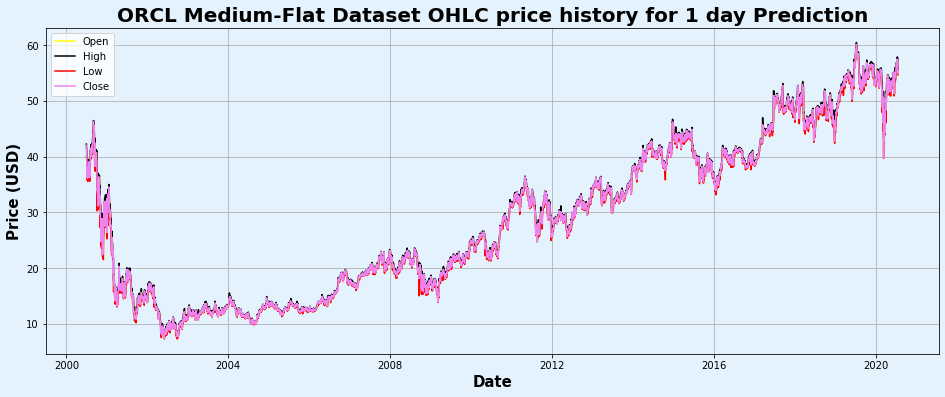

In [14]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e3f2fd')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e3f2fd')
plt.plot(df2["Open"], color = 'yellow')
plt.plot(df2["High"], color = 'black')
plt.plot(df2["Low"], color = 'red')
plt.plot(df2["Close"],color = 'violet')
plt.title('ORCL Medium-Flat Dataset OHLC price history for 1 day Prediction',fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

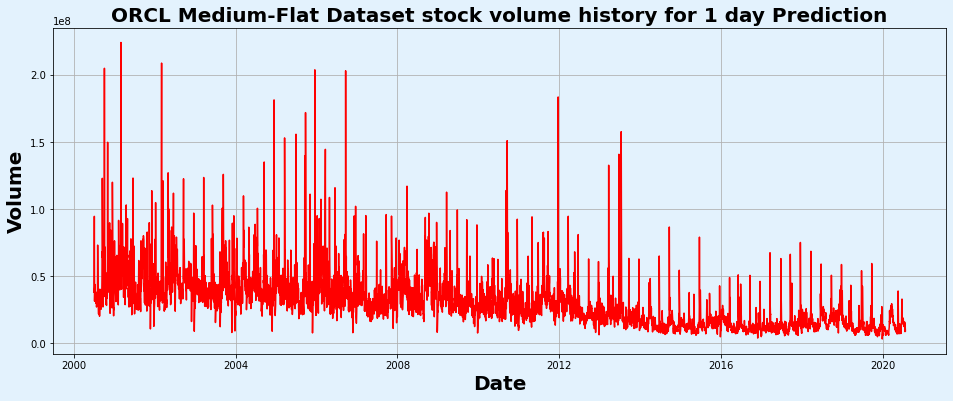

In [15]:
  #plt.figure()
plt.figure(figsize = (16,6), facecolor = '#e3f2fd')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e3f2fd')
plt.plot(df2["Volume"], color = 'red')
plt.title('ORCL Medium-Flat Dataset stock volume history for 1 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Closing Price History**

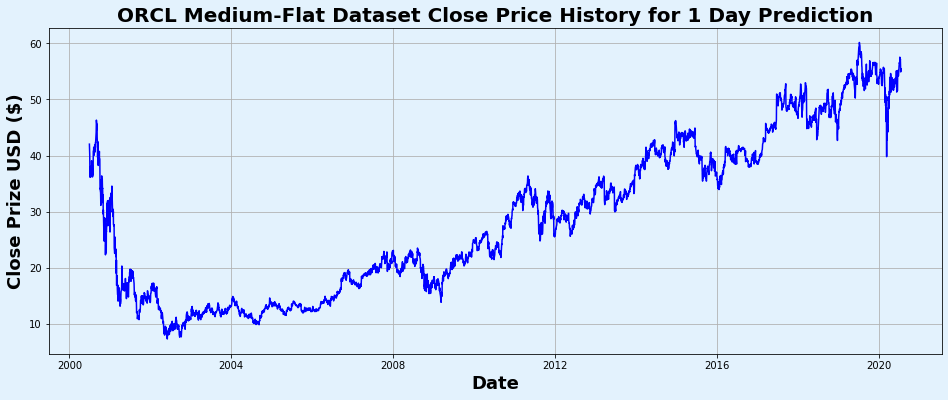

In [16]:
plt.figure(figsize = (16,6), facecolor = '#e3f2fd')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e3f2fd')
plt.title('ORCL Medium-Flat Dataset Close Price History for 1 Day Prediction',fontsize=20,fontweight = "bold")
plt.plot(df2['Close'], color = 'blue',)
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

In [17]:
training_2 = df2[df2.index < datetime.datetime(year=2016, month=7, day=14)]
training_2

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-06-30  40.187500  42.250000  40.000000  42.031250  36.270248  38093000
2000-07-03  40.562500  40.875000  39.437500  40.093750  34.598320  42136200
2000-07-05  38.406250  38.812500  36.093750  36.156250  31.200495  94634200
2000-07-06  35.875000  37.937500  35.875000  37.812500  32.629742  50533000
2000-07-07  37.968750  38.500000  37.750000  37.937500  32.737595  31480200
...               ...        ...        ...        ...        ...       ...
2016-07-07  40.650002  40.830002  40.419998  40.529999  37.940002  11676700
2016-07-08  40.880001  41.180000  40.740002  40.869999  38.258286  14235600
2016-07-11  40.900002  41.139999  40.750000  40.779999  38.174030  12912000
2016-07-12  41.230000  41.580002  41.060001  41.419998  38.773132  13321000
2016-07-13  41.560001  41.650002  41.250000  41.459999  38.810566   9612700

[4033 rows x 6 columns]

In [18]:
testing_2 =df2[df2.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_2

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2016-07-14  41.570000  41.869999  41.500000  41.669998  39.007145   9259800
2016-07-15  41.910000  41.910000  41.459999  41.770000  39.100765  11666300
2016-07-18  41.709999  41.840000  41.580002  41.639999  38.979073   8738900
2016-07-19  41.299999  41.450001  41.009998  41.080002  38.454861  12723000
2016-07-20  41.480000  41.500000  41.250000  41.250000  38.613995  11409700
...               ...        ...        ...        ...        ...       ...
2020-07-14  56.669998  57.290001  56.480000  57.200001  57.200001  15510300
2020-07-15  57.419998  57.840000  56.380001  56.619999  56.619999  10570800
2020-07-16  56.419998  56.490002  55.580002  55.820000  55.820000   8779300
2020-07-17  56.080002  56.119999  54.759998  54.900002  54.900002  14344800
2020-07-20  54.880001  55.514999  54.695000  55.450001  55.450001   9410108

[1011 rows x 6 columns]

**Training & Testing Combination**

<function matplotlib.pyplot.show>

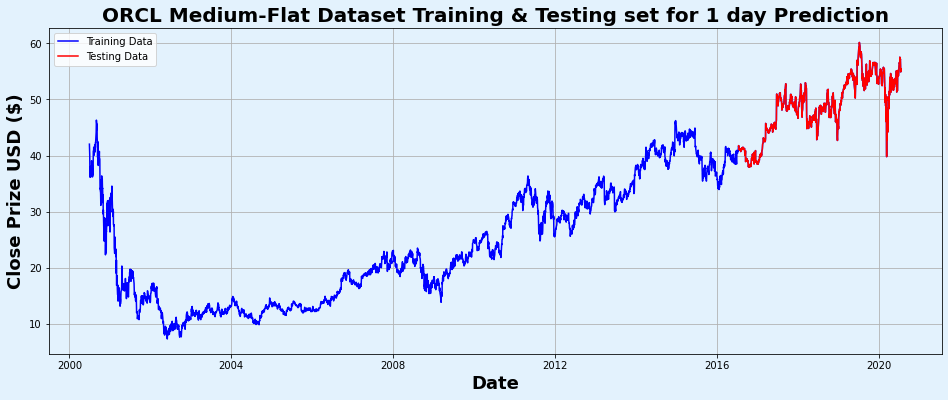

In [19]:
plt.figure(figsize = (16,6), facecolor = '#e3f2fd')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#e3f2fd')
training_2, testing_2 = df2[df2.index < datetime.datetime(year=2016, month=7, day=14)], df2[df2.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('ORCL Medium-Flat Dataset Training & Testing set for 1 day Prediction', color= 'BLACK',fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18,fontweight = "bold")
plt.plot(df2['Close'], 'blue', label='Training Data')
plt.plot(testing_2['Close'], 'red', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [20]:
training_length_2 = training_2.filter(['Close'])
training_length_2

Close
Date                 
2000-06-30  42.031250
2000-07-03  40.093750
2000-07-05  36.156250
2000-07-06  37.812500
2000-07-07  37.937500
...               ...
2016-07-07  40.529999
2016-07-08  40.869999
2016-07-11  40.779999
2016-07-12  41.419998
2016-07-13  41.459999

[4033 rows x 1 columns]

In [21]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-14  41.669998
2016-07-15  41.770000
2016-07-18  41.639999
2016-07-19  41.080002
2016-07-20  41.250000
...               ...
2020-07-14  57.200001
2020-07-15  56.619999
2020-07-16  55.820000
2020-07-17  54.900002
2020-07-20  55.450001

[1011 rows x 1 columns]

In [22]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_2 = sc.fit_transform(training_length_2)
training_length_scaled_2

array([[0.89020324],
       [0.8405142 ],
       [0.73953324],
       ...,
       [0.85811371],
       [0.8745271 ],
       [0.87555297]])

In [23]:
X_train_2 = []
y_train_2 = []
for i in range(30, 4033):
    X_train_2.append(training_length_scaled_2[i-30:i, 0])
    y_train_2.append(training_length_scaled_2[i, 0])
X_train_2, y_train_2 = np.array(X_train_2), np.array(y_train_2)
print (X_train_2[0])
print ('\n')
print (y_train_2[0])

[0.89020324 0.8405142  0.73953324 0.78200936 0.78521511 0.76277489
 0.73953324 0.76998782 0.78361223 0.78842085 0.78842085 0.76357633
 0.75796628 0.81406681 0.77960505 0.773995   0.78681798 0.79643521
 0.77479644 0.74033468 0.77639931 0.74995191 0.74995191 0.80525101
 0.8581458  0.86215298 0.87657883 0.85574149 0.83891133 0.85253574]


0.8685644675258062


In [24]:
X_train_2.shape

(4003, 30)

In [25]:
X_train_2 = np.reshape(X_train_2, (X_train_2.shape[0], X_train_2.shape[1], 1))
X_train_2.shape

(4003, 30, 1)

**Build RNN Model**

In [26]:
#The RNN Model Build
regressorRNN_2 = Sequential()
regressorRNN_2.add(SimpleRNN(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(SimpleRNN(units=64))
regressorRNN_2.add(Dropout(0.2))
regressorRNN_2.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_2.summary()

# Fitting to the training set
history_2 = regressorRNN_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 30, 256)           66048     
_________________________________________________________________
dropout (Dropout)            (None, 30, 256)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                20544     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 86,657
Trainable params: 86,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 40ms/step - loss: 0.1193 - mae: 0.2562 - mse: 0.1193
Epoch 2/1

In [27]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-14  41.669998
2016-07-15  41.770000
2016-07-18  41.639999
2016-07-19  41.080002
2016-07-20  41.250000
...               ...
2020-07-14  57.200001
2020-07-15  56.619999
2020-07-16  55.820000
2020-07-17  54.900002
2020-07-20  55.450001

[1011 rows x 1 columns]

In [28]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[41.099998],
       [41.259998],
       [41.310001],
       [41.310001],
       [41.220001],
       [41.16    ],
       [41.25    ],
       [41.25    ],
       [41.25    ],
       [40.720001],
       [40.029999],
       [40.68    ],
       [40.18    ],
       [40.25    ],
       [40.860001],
       [38.919998],
       [39.23    ],
       [39.07    ],
       [39.509998],
       [39.509998],
       [39.23    ],
       [39.029999],
       [39.299999],
       [39.439999],
       [39.119999],
       [39.279999],
       [38.990002],
       [38.869999],
       [39.150002],
       [38.869999],
       [38.709999],
       [38.619999],
       [38.009998],
       [38.049999],
       [38.029999],
       [38.41    ],
       [38.290001],
       [38.419998],
       [38.349998],
       [38.09    ],
       [37.93    ],
       [38.27    ],
       [38.360001],
       [38.310001],
       [38.220001],
       [38.169998],
       [38.419998],
       [38.459999],
       [38.029999],
       [38.310001],


In [29]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88093859],
       [0.88350324],
       [0.88016924],
       ...,
       [1.24382894],
       [1.22023471],
       [1.23433996]])

In [30]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(981, 30)

In [31]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88093859]
  [0.88350324]
  [0.88016924]
  ...
  [0.86939799]
  [0.87657883]
  [0.86555107]]

 [[0.88350324]
  [0.88016924]
  [0.86580758]
  ...
  [0.87657883]
  [0.86555107]
  [0.86632039]]

 [[0.88016924]
  [0.86580758]
  [0.87016734]
  ...
  [0.86555107]
  [0.86632039]
  [0.87042375]]

 ...

 [[1.18407391]
  [1.1676604 ]
  [1.19664038]
  ...
  [1.27434758]
  [1.27922039]
  [1.26434568]]

 [[1.1676604 ]
  [1.19664038]
  [1.2253638 ]
  ...
  [1.27922039]
  [1.26434568]
  [1.24382894]]

 [[1.19664038]
  [1.2253638 ]
  [1.20176957]
  ...
  [1.26434568]
  [1.24382894]
  [1.22023471]]]


In [32]:
RNN_2_Stock_Price_Prediction = regressorRNN_2.predict(X_test_2)
RNN_2_Stock_Price_Prediction = sc.inverse_transform(RNN_2_Stock_Price_Prediction)

In [33]:
print(RNN_2_Stock_Price_Prediction)

[[40.95762 ]
 [41.030743]
 [41.139038]
 [41.151073]
 [41.178288]
 [41.108414]
 [41.05351 ]
 [41.13751 ]
 [41.123707]
 [41.107666]
 [40.64449 ]
 [40.017384]
 [40.565605]
 [40.0212  ]
 [40.1421  ]
 [40.66886 ]
 [38.91685 ]
 [39.316624]
 [38.927147]
 [39.317368]
 [39.353016]
 [39.129063]
 [38.992138]
 [39.275692]
 [39.299614]
 [38.99657 ]
 [39.216015]
 [38.897186]
 [38.8541  ]
 [39.03492 ]
 [38.778503]
 [38.623802]
 [38.565926]
 [38.01796 ]
 [37.99937 ]
 [37.93084 ]
 [38.24791 ]
 [38.2129  ]
 [38.343914]
 [38.31592 ]
 [38.048515]
 [37.895256]
 [38.179253]
 [38.208103]
 [38.269684]
 [38.15387 ]
 [38.117584]
 [38.34989 ]
 [38.3485  ]
 [37.981213]
 [38.261223]
 [38.18079 ]
 [38.942272]
 [38.9878  ]
 [39.446716]
 [39.485996]
 [39.43162 ]
 [39.26448 ]
 [39.108284]
 [39.55399 ]
 [40.04514 ]
 [39.77476 ]
 [39.850105]
 [40.01416 ]
 [39.979515]
 [40.16571 ]
 [40.16095 ]
 [40.417416]
 [40.127174]
 [38.76012 ]
 [38.544434]
 [38.79139 ]
 [39.227303]
 [40.063396]
 [40.191525]
 [40.4771  ]
 [40.47409 ]

<function matplotlib.pyplot.show>

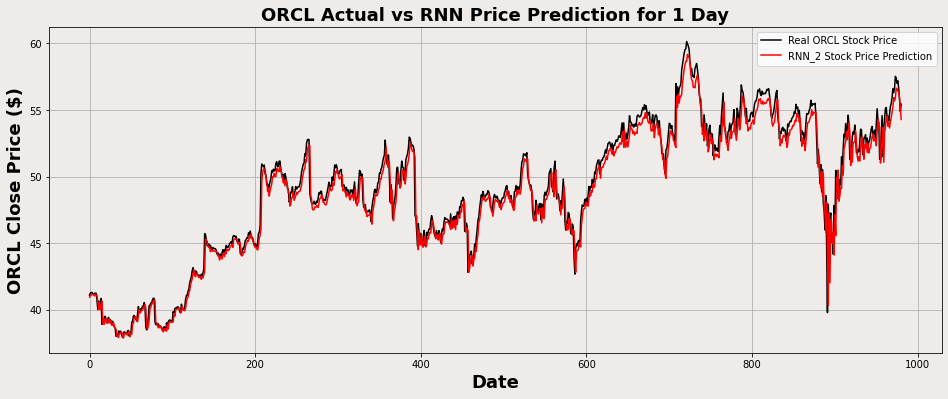

In [34]:
plt.figure(figsize = (16,6), facecolor = '#efebe9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#efebe9')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'black', label = 'Real ORCL Stock Price')
plt.plot(RNN_2_Stock_Price_Prediction, color = 'red', label = 'RNN_2 Stock Price Prediction')
plt.title('ORCL Actual vs RNN Price Prediction for 1 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [40]:
print ('R Squared =',r2_score(y_test_2, RNN_2_Stock_Price_Prediction))

R Squared = 0.9674939998347153


In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.6435174308624113


In [42]:
def mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction): 
    y_test_2, RNN_2_Stock_Price_Prediction = np.array(y_test_2), np.array(RNN_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - RNN_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, RNN_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.2913370162545144


In [43]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction))

Mean Squared Error: 0.8340723840806655


In [44]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, RNN_2_Stock_Price_Prediction)))

Root Mean Squared Error: 0.9132756342313451


**Build LSTM Model**

In [55]:
#The LSTM Model Build
regressorLSTM_2 = Sequential()
regressorLSTM_2.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(LSTM(units=128))
regressorLSTM_2.add(Dropout(0.2))
regressorLSTM_2.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_2.summary()

# Fitting to the training set
history_2 = regressorLSTM_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 256)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0103 - mae: 0.0611 - mse: 0.0103
Epoch 

In [56]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-14  41.669998
2016-07-15  41.770000
2016-07-18  41.639999
2016-07-19  41.080002
2016-07-20  41.250000
...               ...
2020-07-14  57.200001
2020-07-15  56.619999
2020-07-16  55.820000
2020-07-17  54.900002
2020-07-20  55.450001

[1011 rows x 1 columns]

In [57]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[41.099998],
       [41.259998],
       [41.310001],
       [41.310001],
       [41.220001],
       [41.16    ],
       [41.25    ],
       [41.25    ],
       [41.25    ],
       [40.720001],
       [40.029999],
       [40.68    ],
       [40.18    ],
       [40.25    ],
       [40.860001],
       [38.919998],
       [39.23    ],
       [39.07    ],
       [39.509998],
       [39.509998],
       [39.23    ],
       [39.029999],
       [39.299999],
       [39.439999],
       [39.119999],
       [39.279999],
       [38.990002],
       [38.869999],
       [39.150002],
       [38.869999],
       [38.709999],
       [38.619999],
       [38.009998],
       [38.049999],
       [38.029999],
       [38.41    ],
       [38.290001],
       [38.419998],
       [38.349998],
       [38.09    ],
       [37.93    ],
       [38.27    ],
       [38.360001],
       [38.310001],
       [38.220001],
       [38.169998],
       [38.419998],
       [38.459999],
       [38.029999],
       [38.310001],


In [58]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88093859],
       [0.88350324],
       [0.88016924],
       ...,
       [1.24382894],
       [1.22023471],
       [1.23433996]])

In [59]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(981, 30)

In [60]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88093859]
  [0.88350324]
  [0.88016924]
  ...
  [0.86939799]
  [0.87657883]
  [0.86555107]]

 [[0.88350324]
  [0.88016924]
  [0.86580758]
  ...
  [0.87657883]
  [0.86555107]
  [0.86632039]]

 [[0.88016924]
  [0.86580758]
  [0.87016734]
  ...
  [0.86555107]
  [0.86632039]
  [0.87042375]]

 ...

 [[1.18407391]
  [1.1676604 ]
  [1.19664038]
  ...
  [1.27434758]
  [1.27922039]
  [1.26434568]]

 [[1.1676604 ]
  [1.19664038]
  [1.2253638 ]
  ...
  [1.27922039]
  [1.26434568]
  [1.24382894]]

 [[1.19664038]
  [1.2253638 ]
  [1.20176957]
  ...
  [1.26434568]
  [1.24382894]
  [1.22023471]]]


In [61]:
LSTM_2_Stock_Price_Prediction = regressorLSTM_2.predict(X_test_2)
LSTM_2_Stock_Price_Prediction = sc.inverse_transform(LSTM_2_Stock_Price_Prediction)

In [62]:
print(LSTM_2_Stock_Price_Prediction)

[[41.036873]
 [41.093716]
 [41.19163 ]
 [41.23711 ]
 [41.247528]
 [41.175335]
 [41.125664]
 [41.195427]
 [41.188877]
 [41.19614 ]
 [40.742977]
 [40.159477]
 [40.666008]
 [40.173985]
 [40.282272]
 [40.751713]
 [39.11176 ]
 [39.403618]
 [39.102097]
 [39.49024 ]
 [39.461216]
 [39.255962]
 [39.077255]
 [39.277096]
 [39.375168]
 [39.122364]
 [39.26442 ]
 [38.994083]
 [38.902103]
 [39.11145 ]
 [38.86698 ]
 [38.74921 ]
 [38.647026]
 [38.11817 ]
 [38.12812 ]
 [38.05743 ]
 [38.37337 ]
 [38.2694  ]
 [38.404125]
 [38.334755]
 [38.124165]
 [37.976807]
 [38.237904]
 [38.304657]
 [38.289722]
 [38.221054]
 [38.175674]
 [38.378723]
 [38.41252 ]
 [38.072002]
 [38.30476 ]
 [38.251347]
 [38.95863 ]
 [38.999046]
 [39.42739 ]
 [39.46406 ]
 [39.399136]
 [39.280758]
 [39.16772 ]
 [39.609776]
 [40.07458 ]
 [39.792236]
 [39.869797]
 [40.015263]
 [40.03286 ]
 [40.19643 ]
 [40.227196]
 [40.459923]
 [40.158676]
 [38.926212]
 [38.713146]
 [38.980938]
 [39.382866]
 [40.13593 ]
 [40.198647]
 [40.416386]
 [40.4123  ]

<function matplotlib.pyplot.show>

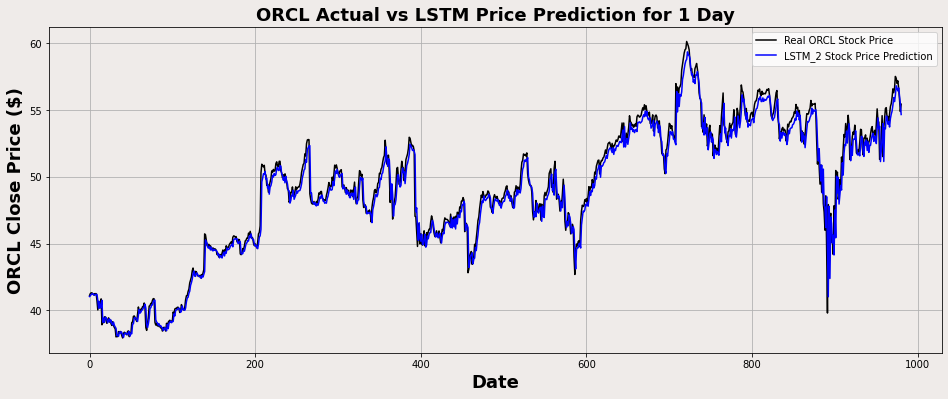

In [63]:
plt.figure(figsize = (16,6), facecolor = '#efebe9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#efebe9')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'black', label = 'Real ORCL Stock Price')
plt.plot(LSTM_2_Stock_Price_Prediction, color = 'blue', label = 'LSTM_2 Stock Price Prediction')
plt.title('ORCL Actual vs LSTM Price Prediction for 1 Day', fontsize = 18,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [64]:
print ('R Squared =',r2_score(y_test_2, LSTM_2_Stock_Price_Prediction))

R Squared = 0.9705532209782824


In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.5870636891980342


In [66]:
def mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction): 
    y_test_2, LSTM_2_Stock_Price_Prediction = np.array(y_test_2), np.array(LSTM_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - LSTM_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, LSTM_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.183294441985535


In [67]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction))

Mean Squared Error: 0.7555757416247892


In [68]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, LSTM_2_Stock_Price_Prediction)))

Root Mean Squared Error: 0.869238598789072


**Build GRU Model**

In [70]:
#The GRU Model Build
regressorGRU_2 = Sequential()
regressorGRU_2.add(GRU(units=512, return_sequences=True, input_shape=(X_train_2.shape[1],1)))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(GRU(units=512))
regressorGRU_2.add(Dropout(0.2))
regressorGRU_2.add(Dense(units=1))
# Compiling the LSTM
regressorGRU_2.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_2.summary()

# Fitting to the training set
history_2 = regressorGRU_2.fit(X_train_2,y_train_2,epochs=100,batch_size=64)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 30, 512)           791040    
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 512)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 512)               1575936   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 2,367,489
Trainable params: 2,367,489
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 15ms/step - loss: 0.0115 - mae: 0.0568 - mse: 0.0115
E

In [71]:
testing_length_2 = testing_2.filter(['Close'])
testing_length_2

Close
Date                 
2016-07-14  41.669998
2016-07-15  41.770000
2016-07-18  41.639999
2016-07-19  41.080002
2016-07-20  41.250000
...               ...
2020-07-14  57.200001
2020-07-15  56.619999
2020-07-16  55.820000
2020-07-17  54.900002
2020-07-20  55.450001

[1011 rows x 1 columns]

In [72]:
y_test_2 = testing_length_2.iloc[30:, 0:].values
y_test_2

array([[41.099998],
       [41.259998],
       [41.310001],
       [41.310001],
       [41.220001],
       [41.16    ],
       [41.25    ],
       [41.25    ],
       [41.25    ],
       [40.720001],
       [40.029999],
       [40.68    ],
       [40.18    ],
       [40.25    ],
       [40.860001],
       [38.919998],
       [39.23    ],
       [39.07    ],
       [39.509998],
       [39.509998],
       [39.23    ],
       [39.029999],
       [39.299999],
       [39.439999],
       [39.119999],
       [39.279999],
       [38.990002],
       [38.869999],
       [39.150002],
       [38.869999],
       [38.709999],
       [38.619999],
       [38.009998],
       [38.049999],
       [38.029999],
       [38.41    ],
       [38.290001],
       [38.419998],
       [38.349998],
       [38.09    ],
       [37.93    ],
       [38.27    ],
       [38.360001],
       [38.310001],
       [38.220001],
       [38.169998],
       [38.419998],
       [38.459999],
       [38.029999],
       [38.310001],


In [73]:
testing_length_scaled_2 = sc.transform(testing_length_2)
testing_length_scaled_2

array([[0.88093859],
       [0.88350324],
       [0.88016924],
       ...,
       [1.24382894],
       [1.22023471],
       [1.23433996]])

In [74]:
X_test_2 = [] 
length_2 = len(testing_length_2)
for i in range(30, length_2):
    X_test_2.append(testing_length_scaled_2[i-30:i, 0])    
X_test_2 = np.array(X_test_2)
X_test_2.shape

(981, 30)

In [75]:
X_test_2 = np.reshape(X_test_2, (X_test_2.shape[0], X_test_2.shape[1], 1))
X_test_2.shape
print(X_test_2)

[[[0.88093859]
  [0.88350324]
  [0.88016924]
  ...
  [0.86939799]
  [0.87657883]
  [0.86555107]]

 [[0.88350324]
  [0.88016924]
  [0.86580758]
  ...
  [0.87657883]
  [0.86555107]
  [0.86632039]]

 [[0.88016924]
  [0.86580758]
  [0.87016734]
  ...
  [0.86555107]
  [0.86632039]
  [0.87042375]]

 ...

 [[1.18407391]
  [1.1676604 ]
  [1.19664038]
  ...
  [1.27434758]
  [1.27922039]
  [1.26434568]]

 [[1.1676604 ]
  [1.19664038]
  [1.2253638 ]
  ...
  [1.27922039]
  [1.26434568]
  [1.24382894]]

 [[1.19664038]
  [1.2253638 ]
  [1.20176957]
  ...
  [1.26434568]
  [1.24382894]
  [1.22023471]]]


In [76]:
GRU_2_Stock_Price_Prediction = regressorGRU_2.predict(X_test_2)
GRU_2_Stock_Price_Prediction = sc.inverse_transform(GRU_2_Stock_Price_Prediction)

In [77]:
print(GRU_2_Stock_Price_Prediction)

[[41.20281 ]
 [41.27777 ]
 [41.354893]
 [41.389748]
 [41.404987]
 [41.34017 ]
 [41.29693 ]
 [41.362   ]
 [41.349564]
 [41.359142]
 [40.92306 ]
 [40.367325]
 [40.8477  ]
 [40.30967 ]
 [40.441063]
 [40.877293]
 [39.262463]
 [39.633816]
 [39.251984]
 [39.623436]
 [39.572063]
 [39.390667]
 [39.23898 ]
 [39.438198]
 [39.51889 ]
 [39.277836]
 [39.439255]
 [39.158978]
 [39.081627]
 [39.278698]
 [39.017586]
 [38.919453]
 [38.814117]
 [38.281937]
 [38.30601 ]
 [38.203297]
 [38.50889 ]
 [38.390114]
 [38.54826 ]
 [38.481247]
 [38.285637]
 [38.15137 ]
 [38.405273]
 [38.44658 ]
 [38.4392  ]
 [38.380775]
 [38.340626]
 [38.540585]
 [38.56072 ]
 [38.230385]
 [38.48198 ]
 [38.400116]
 [39.105515]
 [39.118248]
 [39.576508]
 [39.617725]
 [39.579334]
 [39.4764  ]
 [39.362167]
 [39.784225]
 [40.20494 ]
 [39.931816]
 [40.049   ]
 [40.182785]
 [40.19228 ]
 [40.357567]
 [40.383392]
 [40.61579 ]
 [40.320538]
 [39.1323  ]
 [38.950176]
 [39.14259 ]
 [39.478905]
 [40.206062]
 [40.277004]
 [40.551224]
 [40.575985]

<function matplotlib.pyplot.show>

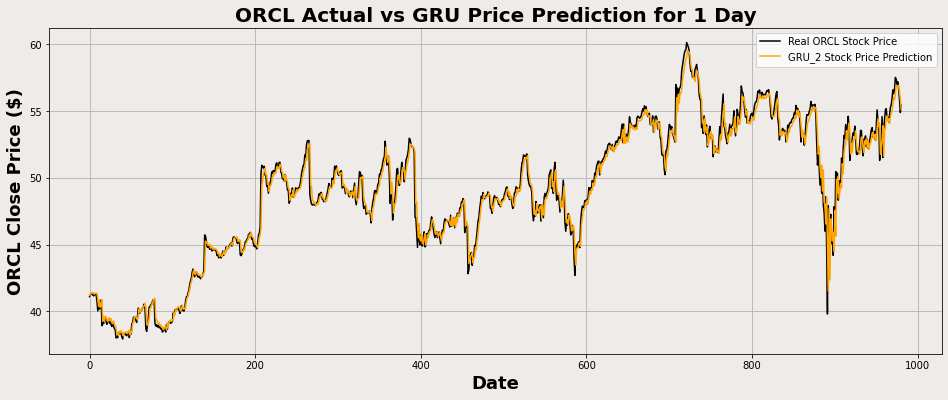

In [78]:
plt.figure(figsize = (16,6), facecolor ='#efebe9')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#efebe9')
#plt.figure(figsize=(16,8))
plt.plot(y_test_2, color = 'BLACK', label = 'Real ORCL Stock Price')
plt.plot(GRU_2_Stock_Price_Prediction, color = 'orange', label = 'GRU_2 Stock Price Prediction')
plt.title('ORCL Actual vs GRU Price Prediction for 1 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [79]:
print ('R Squared =',r2_score(y_test_2, GRU_2_Stock_Price_Prediction))

R Squared = 0.9729596526667258


In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Error: 0.5334452887208028


In [81]:
def mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction): 
    y_test_2, GRU_2_Stock_Price_Prediction = np.array(y_test_2), np.array(GRU_2_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_2 - GRU_2_Stock_Price_Prediction) / y_test_2)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_2, GRU_2_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.082998678065665


In [82]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction))

Mean Squared Error: 0.6938290423907574


In [83]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_2, GRU_2_Stock_Price_Prediction)))

Root Mean Squared Error: 0.8329640102614022


# **Fluctuate Dataset 1 Day Stock Price Prediction**

**Dataset Details : Intuit Inc. (INTU)**

In [5]:
df3 = pd.read_csv('/content/drive/My Drive/Stock Price prediction -20201021T065125Z-001/Stock Price prediction/INTU.csv', date_parser=True)
df3.head()

Date      Open      High       Low     Close  Adj Close   Volume
0  6/30/2000  21.00000  21.00000  19.96875  20.68750  18.821939  5701200
1   7/3/2000  20.53125  20.62500  20.12500  20.15625  18.338593   871000
2   7/5/2000  20.31250  22.46875  20.00000  22.03125  20.044516  7936600
3   7/6/2000  22.00000  22.43750  21.06250  22.37500  20.357264  4842000
4   7/7/2000  22.43750  22.75000  22.06250  22.21875  20.215105  3339600

In [6]:
df3.index.min(), df3.index.max()

(0, 5043)

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [8]:
df3.describe()

Open         High  ...    Adj Close        Volume
count  5044.000000  5044.000000  ...  5044.000000  5.044000e+03
mean     73.211990    74.033175  ...    70.217263  3.359251e+06
std      71.472135    72.207583  ...    71.468699  3.311214e+06
min      11.718750    12.343750  ...    10.661973  3.272000e+05
25%      24.424999    24.765000  ...    22.216713  1.555075e+06
50%      37.335001    37.734998  ...    34.072836  2.587250e+06
75%      97.177498    98.007500  ...    92.544016  4.209875e+06
max     310.540009   314.730011  ...   309.850006  8.864360e+07

[8 rows x 6 columns]

In [9]:
def num_missing(x):
    return sum(x.isnull())

print("Missing values per column:")
print(df3.apply(num_missing, axis=0))

print("\nMissing values per row:")
print(df3.apply(num_missing, axis=1).head())

Missing values per column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Missing values per row:
0    0
1    0
2    0
3    0
4    0
dtype: int64


In [10]:
df3["Date"] = pd.to_datetime(df3["Date"])
df3.head(10)

Date       Open      High       Low     Close  Adj Close   Volume
0 2000-06-30  21.000000  21.00000  19.96875  20.68750  18.821939  5701200
1 2000-07-03  20.531250  20.62500  20.12500  20.15625  18.338593   871000
2 2000-07-05  20.312500  22.46875  20.00000  22.03125  20.044516  7936600
3 2000-07-06  22.000000  22.43750  21.06250  22.37500  20.357264  4842000
4 2000-07-07  22.437500  22.75000  22.06250  22.21875  20.215105  3339600
5 2000-07-10  22.031250  23.09375  21.62500  22.37500  20.357264  3238200
6 2000-07-11  22.328125  23.06250  21.71875  21.87500  19.902359  6255000
7 2000-07-12  22.125000  22.50000  20.56250  21.21875  19.305283  5036200
8 2000-07-13  21.195313  21.93750  20.62500  21.34375  19.419010  4995400
9 2000-07-14  21.718750  21.96875  20.87500  21.12500  19.219984  3816200

In [11]:
df3.set_index('Date',inplace=True)
df3.sort_values('Date',ascending=True)

Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2000-06-30   21.000000   21.000000   19.968750   20.687500   18.821939  5701200
2000-07-03   20.531250   20.625000   20.125000   20.156250   18.338593   871000
2000-07-05   20.312500   22.468750   20.000000   22.031250   20.044516  7936600
2000-07-06   22.000000   22.437500   21.062500   22.375000   20.357264  4842000
2000-07-07   22.437500   22.750000   22.062500   22.218750   20.215105  3339600
...                ...         ...         ...         ...         ...      ...
2020-07-14  294.570007  294.709991  280.989990  285.369995  285.369995  3106100
2020-07-15  288.029999  290.880005  284.769989  289.970001  289.970001  1526100
2020-07-16  287.929993  288.410004  281.190002  285.700012  285.700012  1128500
2020-07-17  287.929993  290.420013  284.589996  289.269989  289.269989   896300
2020-07-20  289.500000  299.709991  289.010010  299.700012  299.700012   635467

[5044 rows x 6 columns]

In [12]:
df3.shape

(5044, 6)

**Open, High, Low, Close Price History**

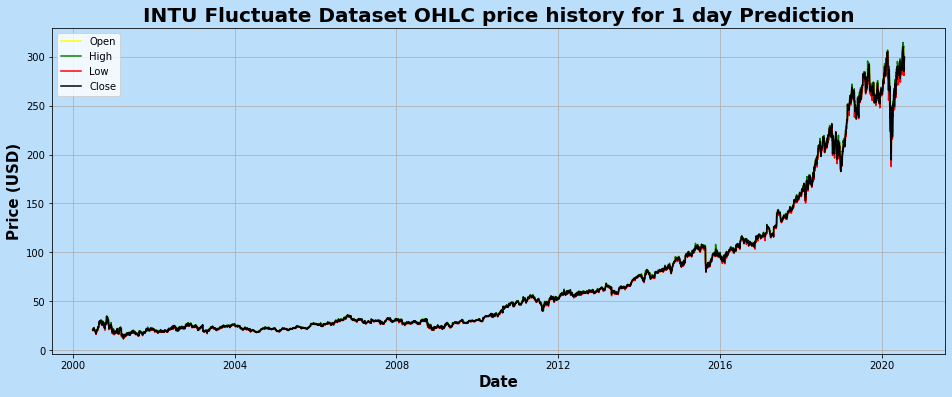

In [13]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#bbdefb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bbdefb')
plt.plot(df3["Open"], color = 'yellow')
plt.plot(df3["High"], color = 'green')
plt.plot(df3["Low"], color = 'red')
plt.plot(df3["Close"],color = 'black')
plt.title('INTU Fluctuate Dataset OHLC price history for 1 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Price (USD)', fontsize=15,fontweight = "bold")
plt.xlabel('Date',fontsize=15,fontweight = "bold")
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.grid()
plt.show()

**Volume History**

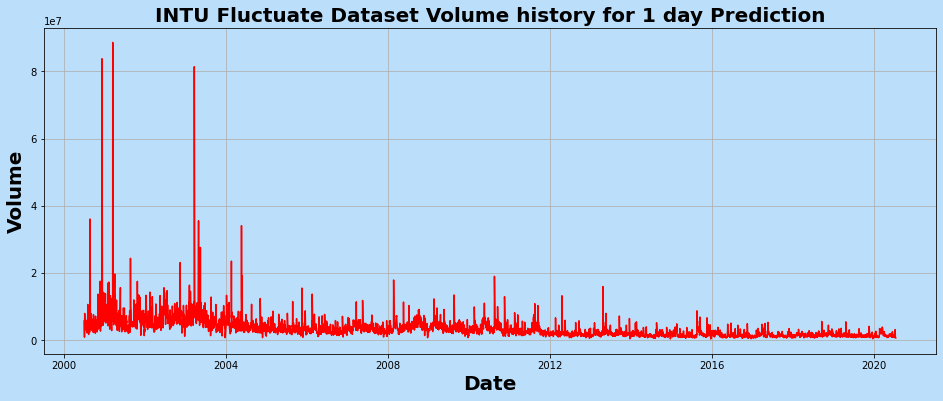

In [14]:
#plt.figure()
plt.figure(figsize = (16,6), facecolor = '#bbdefb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bbdefb')
plt.plot(df3["Volume"], color = 'red')
plt.title('INTU Fluctuate Dataset Volume history for 1 day Prediction', fontsize=20,fontweight = "bold")
plt.ylabel('Volume', fontsize=20,fontweight = "bold")
plt.xlabel('Date', fontsize=20,fontweight = "bold")
plt.grid()
plt.show()

**Close Price History**

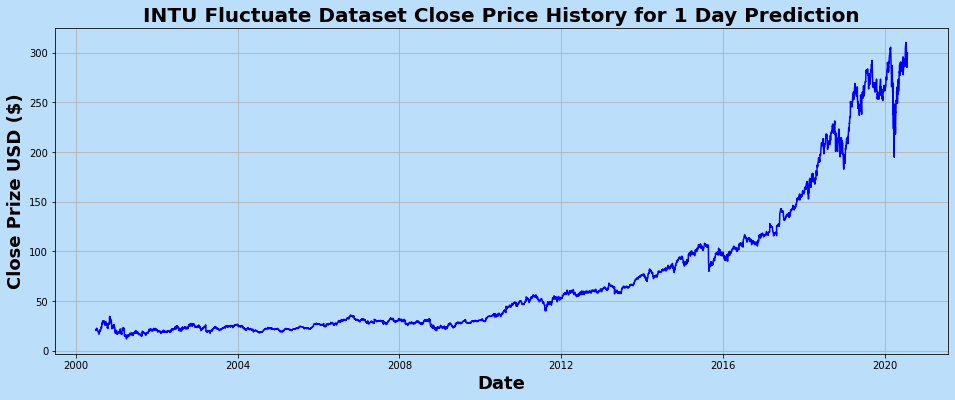

In [15]:
plt.figure(figsize = (16,6), facecolor = '#bbdefb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bbdefb')
plt.title('INTU Fluctuate Dataset Close Price History for 1 Day Prediction',fontsize=20,fontweight= 'bold')
plt.plot(df3['Close'], color = 'blue',)
plt.xlabel("Date" , fontsize = 18, fontweight = "bold")
plt.ylabel("Close Prize USD ($)" , fontsize = 18, fontweight = "bold")
plt.grid()
plt.show()

In [16]:
training_3 = df3[df3.index < datetime.datetime(year=2016, month=7, day=14)]
training_3

Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2000-06-30   21.000000   21.000000   19.968750   20.687500   18.821939  5701200
2000-07-03   20.531250   20.625000   20.125000   20.156250   18.338593   871000
2000-07-05   20.312500   22.468750   20.000000   22.031250   20.044516  7936600
2000-07-06   22.000000   22.437500   21.062500   22.375000   20.357264  4842000
2000-07-07   22.437500   22.750000   22.062500   22.218750   20.215105  3339600
...                ...         ...         ...         ...         ...      ...
2016-07-07  113.190002  114.260002  112.870003  114.250000  109.840569  1074400
2016-07-08  115.000000  116.029999  113.980003  115.480003  111.315399  1507500
2016-07-11  116.050003  116.400002  115.349998  115.629997  111.459961  1535900
2016-07-12  116.449997  116.720001  115.500000  116.339996  112.144386  1199200
2016-07-13  116.959999  116.970001  115.910004  115.919998  111.739510   967100

[4033 rows x 6 columns]

In [17]:
testing_3 =df3[df3.index >= datetime.datetime(year=2016, month=7, day=14)]
testing_3

Open        High         Low       Close   Adj Close   Volume
Date                                                                           
2016-07-14  116.519997  116.870003  115.639999  116.389999  112.192574   881500
2016-07-15  116.580002  116.580002  114.459999  114.980003  110.833405  2158400
2016-07-18  114.889999  115.750000  114.550003  115.250000  111.093674   737400
2016-07-19  115.070000  115.489998  114.559998  114.779999  110.640625   865600
2016-07-20  112.779999  115.290001  112.720001  114.790001  110.650269  1555100
...                ...         ...         ...         ...         ...      ...
2020-07-14  294.570007  294.709991  280.989990  285.369995  285.369995  3106100
2020-07-15  288.029999  290.880005  284.769989  289.970001  289.970001  1526100
2020-07-16  287.929993  288.410004  281.190002  285.700012  285.700012  1128500
2020-07-17  287.929993  290.420013  284.589996  289.269989  289.269989   896300
2020-07-20  289.500000  299.709991  289.010010  299.700012  299.700012   635467

[1011 rows x 6 columns]

**INTU Training & Testing Combination**

<function matplotlib.pyplot.show>

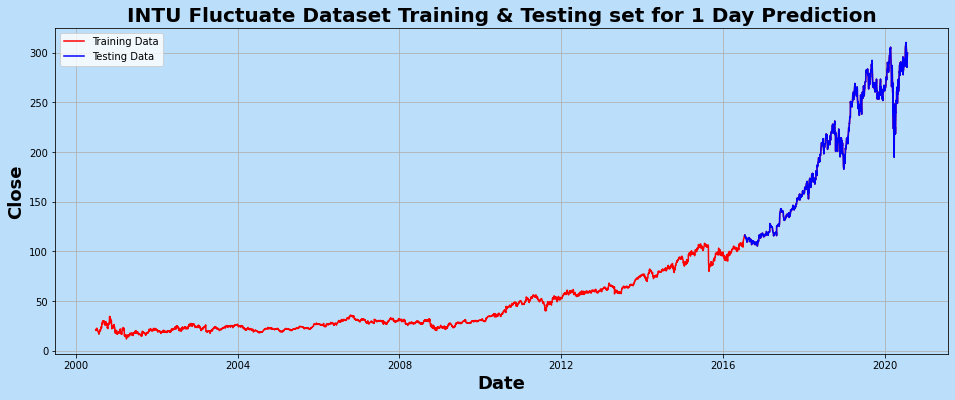

In [18]:
plt.figure(figsize = (16,6), facecolor = '#bbdefb')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#bbdefb')
training_3, testing_3 = df3[df3.index < datetime.datetime(year=2016, month=7, day=14)], df3[df3.index >= datetime.datetime(year=2016, month=7, day=14)]
#plt.figure(figsize=(12,7))
plt.title('INTU Fluctuate Dataset Training & Testing set for 1 Day Prediction', fontsize = 20,fontweight = "bold")
plt.xlabel('Date' , fontsize = 18,fontweight = "bold")
plt.ylabel('Close', fontsize = 18,fontweight = "bold")
plt.plot(df3['Close'], 'red', label='Training Data')
plt.plot(testing_3['Close'], 'blue', label='Testing Data')
#plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.grid()
plt.show

In [19]:
training_length_3 = training_3.filter(['Close'])
training_length_3

Close
Date                  
2000-06-30   20.687500
2000-07-03   20.156250
2000-07-05   22.031250
2000-07-06   22.375000
2000-07-07   22.218750
...                ...
2016-07-07  114.250000
2016-07-08  115.480003
2016-07-11  115.629997
2016-07-12  116.339996
2016-07-13  115.919998

[4033 rows x 1 columns]

In [20]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-14  116.389999
2016-07-15  114.980003
2016-07-18  115.250000
2016-07-19  114.779999
2016-07-20  114.790001
...                ...
2020-07-14  285.369995
2020-07-15  289.970001
2020-07-16  285.700012
2020-07-17  289.269989
2020-07-20  299.700012

[1011 rows x 1 columns]

In [21]:
sc = MinMaxScaler(feature_range=(0,1))
training_length_scaled_3 = sc.fit_transform(training_length_3)
training_length_scaled_3

array([[0.0857259 ],
       [0.08064805],
       [0.09856984],
       ...,
       [0.99321363],
       [1.        ],
       [0.99598554]])

In [22]:
X_train_3 = []
y_train_3 = []
for i in range(30, 4033):
    X_train_3.append(training_length_scaled_3[i-30:i, 0])
    y_train_3.append(training_length_scaled_3[i, 0])
X_train_3, y_train_3 = np.array(X_train_3), np.array(y_train_3)
print (X_train_3[0])
print ('\n')
print (y_train_3[0])

[0.0857259  0.08064805 0.09856984 0.10185551 0.10036202 0.10185551
 0.09707636 0.09080374 0.09199852 0.08990765 0.08423241 0.0770637
 0.07467412 0.07377804 0.06899889 0.06541453 0.06631062 0.05734973
 0.05376537 0.04629796 0.05047971 0.05525885 0.07527152 0.07437543
 0.07437543 0.08632329 0.08960895 0.08184284 0.07795979 0.08333632]


0.09140112898292188


In [23]:
X_train_3.shape

(4003, 30)

In [24]:
X_train_3 = np.reshape(X_train_3, (X_train_3.shape[0], X_train_3.shape[1], 1))
X_train_3.shape

(4003, 30, 1)

**Build RNN Model**

In [39]:
#The RNN Model Build
regressorRNN_3 = Sequential()
regressorRNN_3.add(SimpleRNN(units=64, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(SimpleRNN(units=256))
regressorRNN_3.add(Dropout(0.2))
regressorRNN_3.add(Dense(units=1, activation='relu'))
# Compiling the RNN
regressorRNN_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorRNN_3.summary()

# Fitting to the training set
history_3 = regressorRNN_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 30, 64)            4224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 64)            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 86,657
Trainable params: 86,657
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 3s 48ms/step - loss: 0.1172 - mae: 0.2236 - mse: 0.1172
Epoch 2

In [40]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-14  116.389999
2016-07-15  114.980003
2016-07-18  115.250000
2016-07-19  114.779999
2016-07-20  114.790001
...                ...
2020-07-14  285.369995
2020-07-15  289.970001
2020-07-16  285.700012
2020-07-17  289.269989
2020-07-20  299.700012

[1011 rows x 1 columns]

In [41]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[110.      ],
       [110.32    ],
       [110.760002],
       [111.150002],
       [111.449997],
       [112.339996],
       [112.07    ],
       [111.370003],
       [111.970001],
       [110.959999],
       [109.25    ],
       [109.540001],
       [106.699997],
       [108.110001],
       [109.760002],
       [109.      ],
       [108.980003],
       [108.970001],
       [110.779999],
       [110.760002],
       [109.900002],
       [108.980003],
       [110.110001],
       [110.18    ],
       [109.309998],
       [110.010002],
       [109.160004],
       [109.370003],
       [108.610001],
       [108.839996],
       [107.449997],
       [108.150002],
       [106.989998],
       [107.529999],
       [106.800003],
       [106.989998],
       [106.879997],
       [107.150002],
       [108.190002],
       [107.900002],
       [108.449997],
       [109.629997],
       [108.32    ],
       [107.82    ],
       [107.309998],
       [108.169998],
       [108.739998],
       [107.3

In [42]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[1.00047794],
       [0.9870008 ],
       [0.9895815 ],
       ...,
       [2.61879181],
       [2.65291468],
       [2.75260784]])

In [43]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(981, 30)

In [44]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[1.00047794]
  [0.9870008 ]
  [0.9895815 ]
  ...
  [0.96367855]
  [0.97610428]
  [0.93796673]]

 [[0.9870008 ]
  [0.9895815 ]
  [0.9850891 ]
  ...
  [0.97610428]
  [0.93796673]
  [0.93940049]]

 [[0.9895815 ]
  [0.9850891 ]
  [0.9851847 ]
  ...
  [0.93796673]
  [0.93940049]
  [0.94245914]]

 ...

 [[2.66084822]
  [2.59221978]
  [2.64182702]
  ...
  [2.7329178 ]
  [2.61563741]
  [2.65960559]]

 [[2.59221978]
  [2.64182702]
  [2.689045  ]
  ...
  [2.61563741]
  [2.65960559]
  [2.61879181]]

 [[2.64182702]
  [2.689045  ]
  [2.67184019]
  ...
  [2.65960559]
  [2.61879181]
  [2.65291468]]]


In [45]:
RNN_3_Stock_Price_Prediction = regressorRNN_3.predict(X_test_3)
RNN_3_Stock_Price_Prediction = sc.inverse_transform(RNN_3_Stock_Price_Prediction)

In [46]:
print(RNN_3_Stock_Price_Prediction)

[[112.97283 ]
 [112.59372 ]
 [112.798164]
 [112.97237 ]
 [113.600945]
 [113.62084 ]
 [114.19774 ]
 [114.21022 ]
 [113.677826]
 [114.1517  ]
 [113.3083  ]
 [111.66933 ]
 [111.79377 ]
 [109.37512 ]
 [110.20034 ]
 [111.373726]
 [110.993996]
 [110.93321 ]
 [110.854256]
 [112.17477 ]
 [112.789665]
 [112.13652 ]
 [111.4516  ]
 [112.0669  ]
 [112.3161  ]
 [111.94082 ]
 [112.59413 ]
 [111.521484]
 [111.67819 ]
 [110.93909 ]
 [110.93427 ]
 [109.926285]
 [110.14471 ]
 [109.37432 ]
 [109.823456]
 [109.267136]
 [109.31589 ]
 [109.08167 ]
 [109.482155]
 [110.17847 ]
 [109.88529 ]
 [110.34785 ]
 [111.13425 ]
 [110.3801  ]
 [110.13863 ]
 [109.5824  ]
 [110.15666 ]
 [110.83164 ]
 [109.98975 ]
 [108.929985]
 [108.058235]
 [107.57779 ]
 [109.76514 ]
 [110.4462  ]
 [111.10656 ]
 [111.157875]
 [112.910645]
 [112.32243 ]
 [113.05206 ]
 [113.1052  ]
 [115.18457 ]
 [117.59463 ]
 [117.70495 ]
 [118.51587 ]
 [117.95905 ]
 [117.98395 ]
 [118.05707 ]
 [118.32666 ]
 [116.53069 ]
 [115.96968 ]
 [115.80859 ]
 [117.

<function matplotlib.pyplot.show>

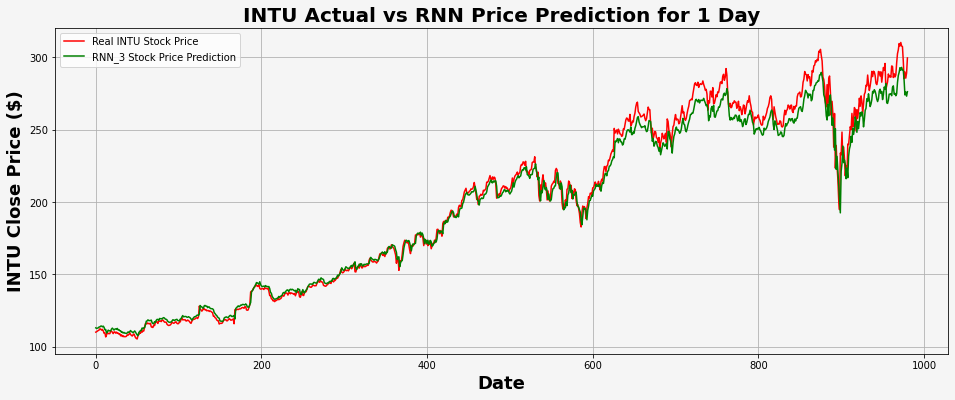

In [47]:
plt.figure(figsize = (16,6), facecolor = '#f5f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f5f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real INTU Stock Price')
plt.plot(RNN_3_Stock_Price_Prediction, color ='green', label = 'RNN_3 Stock Price Prediction')
plt.title('INTU Actual vs RNN Price Prediction for 1 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [48]:
print ('R Squared =',r2_score(y_test_3, RNN_3_Stock_Price_Prediction))

R Squared = 0.9855581408053947


In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Error: 5.261188843097465


In [50]:
def mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction): 
    y_test_3, RNN_3_Stock_Price_Prediction = np.array(y_test_3), np.array(RNN_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - RNN_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, RNN_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 2.349140797270142


In [51]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction))

Mean Squared Error: 53.65539222607808


In [52]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, RNN_3_Stock_Price_Prediction)))

Root Mean Squared Error: 7.324984110977858


**Build LSTM Model**

In [166]:
#The LSTM Model Build
regressorLSTM_3 = Sequential()
regressorLSTM_3.add(LSTM(units=256, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(LSTM(units=128))
regressorLSTM_3.add(Dropout(0.2))
regressorLSTM_3.add(Dense(units=1))
# Compiling the LSTM
regressorLSTM_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorLSTM_3.summary()

# Fitting to the training set
history_3 = regressorLSTM_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 30, 256)           264192    
_________________________________________________________________
dropout_20 (Dropout)         (None, 30, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 9ms/step - loss: 0.0066 - mae: 0.0430 - mse: 0.0066
Epoch

In [167]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-14  116.389999
2016-07-15  114.980003
2016-07-18  115.250000
2016-07-19  114.779999
2016-07-20  114.790001
...                ...
2020-07-14  285.369995
2020-07-15  289.970001
2020-07-16  285.700012
2020-07-17  289.269989
2020-07-20  299.700012

[1011 rows x 1 columns]

In [168]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[110.      ],
       [110.32    ],
       [110.760002],
       [111.150002],
       [111.449997],
       [112.339996],
       [112.07    ],
       [111.370003],
       [111.970001],
       [110.959999],
       [109.25    ],
       [109.540001],
       [106.699997],
       [108.110001],
       [109.760002],
       [109.      ],
       [108.980003],
       [108.970001],
       [110.779999],
       [110.760002],
       [109.900002],
       [108.980003],
       [110.110001],
       [110.18    ],
       [109.309998],
       [110.010002],
       [109.160004],
       [109.370003],
       [108.610001],
       [108.839996],
       [107.449997],
       [108.150002],
       [106.989998],
       [107.529999],
       [106.800003],
       [106.989998],
       [106.879997],
       [107.150002],
       [108.190002],
       [107.900002],
       [108.449997],
       [109.629997],
       [108.32    ],
       [107.82    ],
       [107.309998],
       [108.169998],
       [108.739998],
       [107.3

In [169]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[1.00047794],
       [0.9870008 ],
       [0.9895815 ],
       ...,
       [2.61879181],
       [2.65291468],
       [2.75260784]])

In [170]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(981, 30)

In [171]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[1.00047794]
  [0.9870008 ]
  [0.9895815 ]
  ...
  [0.96367855]
  [0.97610428]
  [0.93796673]]

 [[0.9870008 ]
  [0.9895815 ]
  [0.9850891 ]
  ...
  [0.97610428]
  [0.93796673]
  [0.93940049]]

 [[0.9895815 ]
  [0.9850891 ]
  [0.9851847 ]
  ...
  [0.93796673]
  [0.93940049]
  [0.94245914]]

 ...

 [[2.66084822]
  [2.59221978]
  [2.64182702]
  ...
  [2.7329178 ]
  [2.61563741]
  [2.65960559]]

 [[2.59221978]
  [2.64182702]
  [2.689045  ]
  ...
  [2.61563741]
  [2.65960559]
  [2.61879181]]

 [[2.64182702]
  [2.689045  ]
  [2.67184019]
  ...
  [2.65960559]
  [2.61879181]
  [2.65291468]]]


In [172]:
LSTM_3_Stock_Price_Prediction = regressorLSTM_3.predict(X_test_3)
LSTM_3_Stock_Price_Prediction = sc.inverse_transform(LSTM_3_Stock_Price_Prediction)

In [173]:
print(LSTM_3_Stock_Price_Prediction)

[[113.74486 ]
 [113.087906]
 [113.18217 ]
 [113.493866]
 [113.79795 ]
 [114.04638 ]
 [114.68993 ]
 [114.69626 ]
 [114.22028 ]
 [114.492905]
 [113.935356]
 [112.62504 ]
 [112.431076]
 [110.5253  ]
 [110.82998 ]
 [112.05262 ]
 [111.85991 ]
 [111.702934]
 [111.64884 ]
 [112.843895]
 [113.200874]
 [112.700455]
 [111.94585 ]
 [112.50539 ]
 [112.76211 ]
 [112.23699 ]
 [112.529915]
 [112.08013 ]
 [112.067215]
 [111.57285 ]
 [111.5644  ]
 [110.64882 ]
 [110.80993 ]
 [110.10976 ]
 [110.21525 ]
 [109.76942 ]
 [109.72599 ]
 [109.636604]
 [109.77001 ]
 [110.49057 ]
 [110.5098  ]
 [110.852196]
 [111.75518 ]
 [111.16889 ]
 [110.64073 ]
 [110.18411 ]
 [110.64145 ]
 [111.17553 ]
 [110.417625]
 [109.368835]
 [108.67149 ]
 [108.26761 ]
 [109.873405]
 [110.660576]
 [111.48871 ]
 [111.63817 ]
 [113.11766 ]
 [112.69628 ]
 [113.14786 ]
 [113.32429 ]
 [115.36223 ]
 [117.46056 ]
 [117.83793 ]
 [118.45814 ]
 [118.311646]
 [118.49958 ]
 [118.38318 ]
 [118.68702 ]
 [117.15417 ]
 [116.50004 ]
 [116.28374 ]
 [117.

<function matplotlib.pyplot.show>

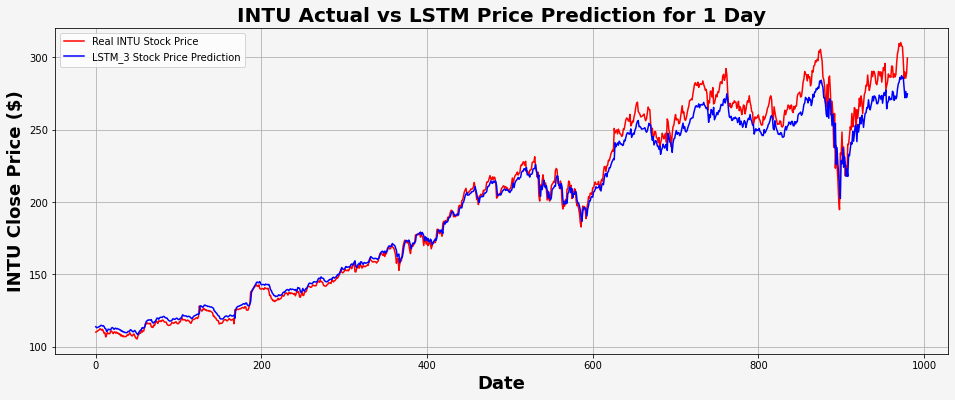

In [174]:
plt.figure(figsize = (16,6), facecolor ='#f5f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f5f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real INTU Stock Price')
plt.plot(LSTM_3_Stock_Price_Prediction, color = 'blue', label = 'LSTM_3 Stock Price Prediction')
plt.title('INTU Actual vs LSTM Price Prediction for 1 Day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('INTU Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show

In [175]:
print ('R Squared =',r2_score(y_test_3, LSTM_3_Stock_Price_Prediction))

R Squared = 0.980465714081406


In [176]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Error: 6.202823125395202


In [177]:
def mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction): 
    y_test_3, LSTM_3_Stock_Price_Prediction = np.array(y_test_3), np.array(LSTM_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - LSTM_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, LSTM_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 2.788823577739114


In [178]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction))

Mean Squared Error: 72.57512752998143


In [179]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, LSTM_3_Stock_Price_Prediction)))

Root Mean Squared Error: 8.51910368113814


**Build GRU Model**

In [190]:
#The GRU Model Build
regressorGRU_3 = Sequential()
regressorGRU_3.add(GRU(units=512, return_sequences=True, input_shape=(X_train_3.shape[1],1)))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(GRU(units=1024))
regressorGRU_3.add(Dropout(0.2))
regressorGRU_3.add(Dense(units=1))
# Compiling the GRU
regressorGRU_3.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae','mse'])
regressorGRU_3.summary()

# Fitting to the training set
history_3 = regressorGRU_3.fit(X_train_3,y_train_3,epochs=100,batch_size=64)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_4 (GRU)                  (None, 30, 512)           791040    
_________________________________________________________________
dropout_24 (Dropout)         (None, 30, 512)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 1024)              4724736   
_________________________________________________________________
dropout_25 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 1025      
Total params: 5,516,801
Trainable params: 5,516,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 2s 26ms/step - loss: 0.0040 - mae: 0.0259 - mse: 0.0040


In [191]:
testing_length_3 = testing_3.filter(['Close'])
testing_length_3

Close
Date                  
2016-07-14  116.389999
2016-07-15  114.980003
2016-07-18  115.250000
2016-07-19  114.779999
2016-07-20  114.790001
...                ...
2020-07-14  285.369995
2020-07-15  289.970001
2020-07-16  285.700012
2020-07-17  289.269989
2020-07-20  299.700012

[1011 rows x 1 columns]

In [192]:
y_test_3 = testing_length_3.iloc[30:, 0:].values
y_test_3

array([[110.      ],
       [110.32    ],
       [110.760002],
       [111.150002],
       [111.449997],
       [112.339996],
       [112.07    ],
       [111.370003],
       [111.970001],
       [110.959999],
       [109.25    ],
       [109.540001],
       [106.699997],
       [108.110001],
       [109.760002],
       [109.      ],
       [108.980003],
       [108.970001],
       [110.779999],
       [110.760002],
       [109.900002],
       [108.980003],
       [110.110001],
       [110.18    ],
       [109.309998],
       [110.010002],
       [109.160004],
       [109.370003],
       [108.610001],
       [108.839996],
       [107.449997],
       [108.150002],
       [106.989998],
       [107.529999],
       [106.800003],
       [106.989998],
       [106.879997],
       [107.150002],
       [108.190002],
       [107.900002],
       [108.449997],
       [109.629997],
       [108.32    ],
       [107.82    ],
       [107.309998],
       [108.169998],
       [108.739998],
       [107.3

In [193]:
testing_length_scaled_3 = sc.transform(testing_length_3)
testing_length_scaled_3

array([[1.00047794],
       [0.9870008 ],
       [0.9895815 ],
       ...,
       [2.61879181],
       [2.65291468],
       [2.75260784]])

In [194]:
X_test_3 = [] 
length_3 = len(testing_length_3)
for i in range(30, length_3):
    X_test_3.append(testing_length_scaled_3[i-30:i, 0])    
X_test_3 = np.array(X_test_3)
X_test_3.shape

(981, 30)

In [195]:
X_test_3 = np.reshape(X_test_3, (X_test_3.shape[0], X_test_3.shape[1], 1))
X_test_3.shape
print(X_test_3)

[[[1.00047794]
  [0.9870008 ]
  [0.9895815 ]
  ...
  [0.96367855]
  [0.97610428]
  [0.93796673]]

 [[0.9870008 ]
  [0.9895815 ]
  [0.9850891 ]
  ...
  [0.97610428]
  [0.93796673]
  [0.93940049]]

 [[0.9895815 ]
  [0.9850891 ]
  [0.9851847 ]
  ...
  [0.93796673]
  [0.93940049]
  [0.94245914]]

 ...

 [[2.66084822]
  [2.59221978]
  [2.64182702]
  ...
  [2.7329178 ]
  [2.61563741]
  [2.65960559]]

 [[2.59221978]
  [2.64182702]
  [2.689045  ]
  ...
  [2.61563741]
  [2.65960559]
  [2.61879181]]

 [[2.64182702]
  [2.689045  ]
  [2.67184019]
  ...
  [2.65960559]
  [2.61879181]
  [2.65291468]]]


In [196]:
GRU_3_Stock_Price_Prediction = regressorGRU_3.predict(X_test_3)
GRU_3_Stock_Price_Prediction = sc.inverse_transform(GRU_3_Stock_Price_Prediction)

In [197]:
print(GRU_3_Stock_Price_Prediction)

[[110.61933 ]
 [111.03018 ]
 [110.874695]
 [111.23657 ]
 [111.472664]
 [111.72405 ]
 [112.50193 ]
 [112.281166]
 [111.810165]
 [112.34033 ]
 [111.41367 ]
 [110.05263 ]
 [110.24699 ]
 [107.61919 ]
 [108.9122  ]
 [109.90931 ]
 [109.30077 ]
 [109.4039  ]
 [109.34151 ]
 [110.91861 ]
 [110.82779 ]
 [110.290535]
 [109.568344]
 [110.53157 ]
 [110.4626  ]
 [109.81898 ]
 [110.444214]
 [109.621086]
 [109.91233 ]
 [109.12905 ]
 [109.380585]
 [108.08239 ]
 [108.75054 ]
 [107.5626  ]
 [108.12405 ]
 [107.32319 ]
 [107.559784]
 [107.34388 ]
 [107.59897 ]
 [108.43927 ]
 [108.16679 ]
 [108.75664 ]
 [109.71637 ]
 [108.64986 ]
 [108.4195  ]
 [107.89947 ]
 [108.63292 ]
 [109.00746 ]
 [107.9117  ]
 [106.98689 ]
 [106.39258 ]
 [106.013275]
 [108.1739  ]
 [108.371315]
 [109.44252 ]
 [109.34384 ]
 [111.35799 ]
 [110.141846]
 [111.23682 ]
 [111.06988 ]
 [113.73145 ]
 [115.45816 ]
 [115.46855 ]
 [116.41889 ]
 [115.968346]
 [116.39517 ]
 [116.06282 ]
 [116.52999 ]
 [114.38237 ]
 [114.26585 ]
 [113.896194]
 [115.

<function matplotlib.pyplot.show>

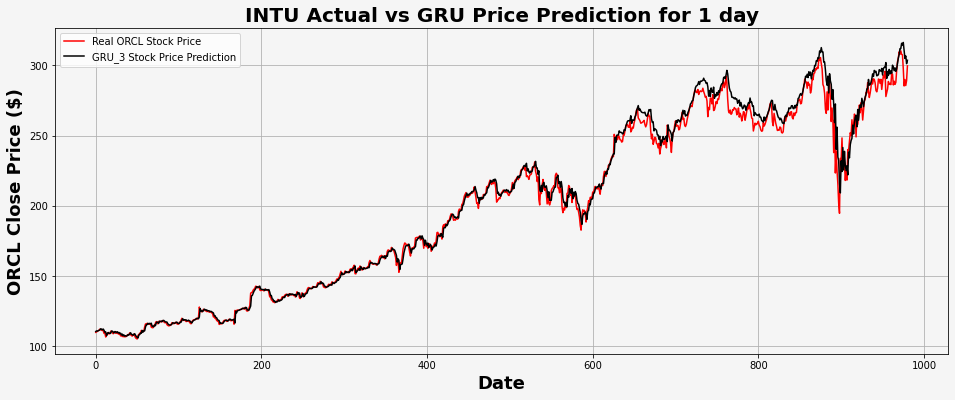

In [198]:
plt.figure(figsize = (16,6), facecolor = '#f5f5f5')
#plt.plot(x,y)
ax = plt.axes()
ax.set_facecolor('#f5f5f5')
#plt.figure(figsize=(16,8))
plt.plot(y_test_3, color = 'red', label = 'Real ORCL Stock Price')
plt.plot(GRU_3_Stock_Price_Prediction, color = 'Black', label = 'GRU_3 Stock Price Prediction')
plt.title('INTU Actual vs GRU Price Prediction for 1 day', fontsize = 20,fontweight = "bold")
plt.xlabel('Date', fontsize = 18,fontweight = "bold")
plt.ylabel('ORCL Close Price ($)', fontsize = 18,fontweight = "bold")
plt.legend()
plt.grid()
plt.show


In [204]:
print ('R Squared =',r2_score(y_test_3, GRU_3_Stock_Price_Prediction))

R Squared = 0.9898374172102862


In [205]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Error: 3.7020959818917842


In [206]:
def mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction): 
    y_test_3, GRU_3_Stock_Price_Prediction = np.array(y_test_3), np.array(GRU_3_Stock_Price_Prediction)
    return np.mean(np.abs((y_test_3 - GRU_3_Stock_Price_Prediction) / y_test_3)) * 100  
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_3, GRU_3_Stock_Price_Prediction)) 

Mean Absolute Percentage Error: 1.645237760610905


In [207]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction))

Mean Squared Error: 37.756729120844234


In [208]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_3, GRU_3_Stock_Price_Prediction)))

Root Mean Squared Error: 6.14465044740905


#*#############  Thank you  ############*

# **>>>>>   The End One Day Price Prediction   <<<<<**